# Subclustering of lateral ectoderm in Set 1

In [1]:
#loading packages
library(Seurat)
library(ggplot2)
library(magrittr)
library(data.table)
library(Matrix)
library(dplyr)
library(tibble)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#loading data
seu_HQC <- readRDS(file = '../../data/seurat_object/Set1/seu_HQC2_Set1.obj')
seu_HQC

An object of class Seurat 
28877 features across 1018 samples within 2 assays 
Active assay: SCT (11281 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


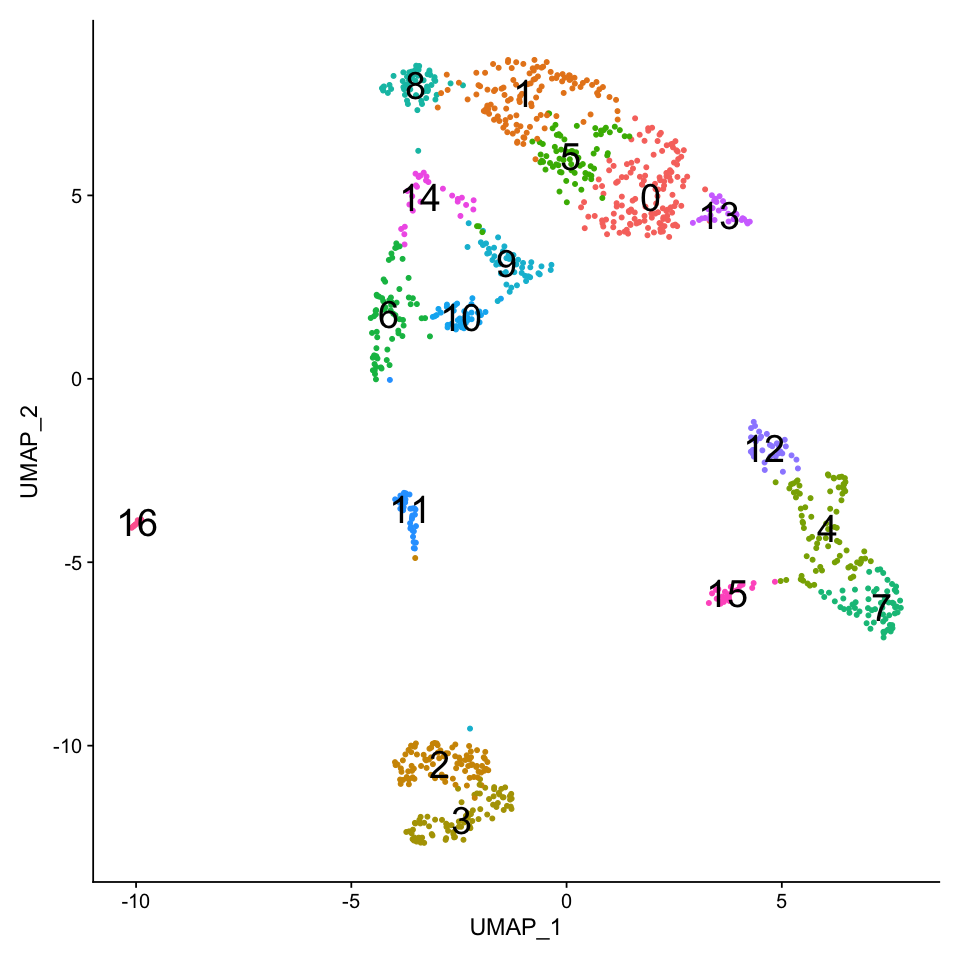

In [3]:
Idents(seu_HQC) <- 'seurat_clusters'
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu_HQC, reduction = 'umap', label = TRUE, label.size = 8) + NoLegend()

## Picking up target clusters
Note: Including PS1

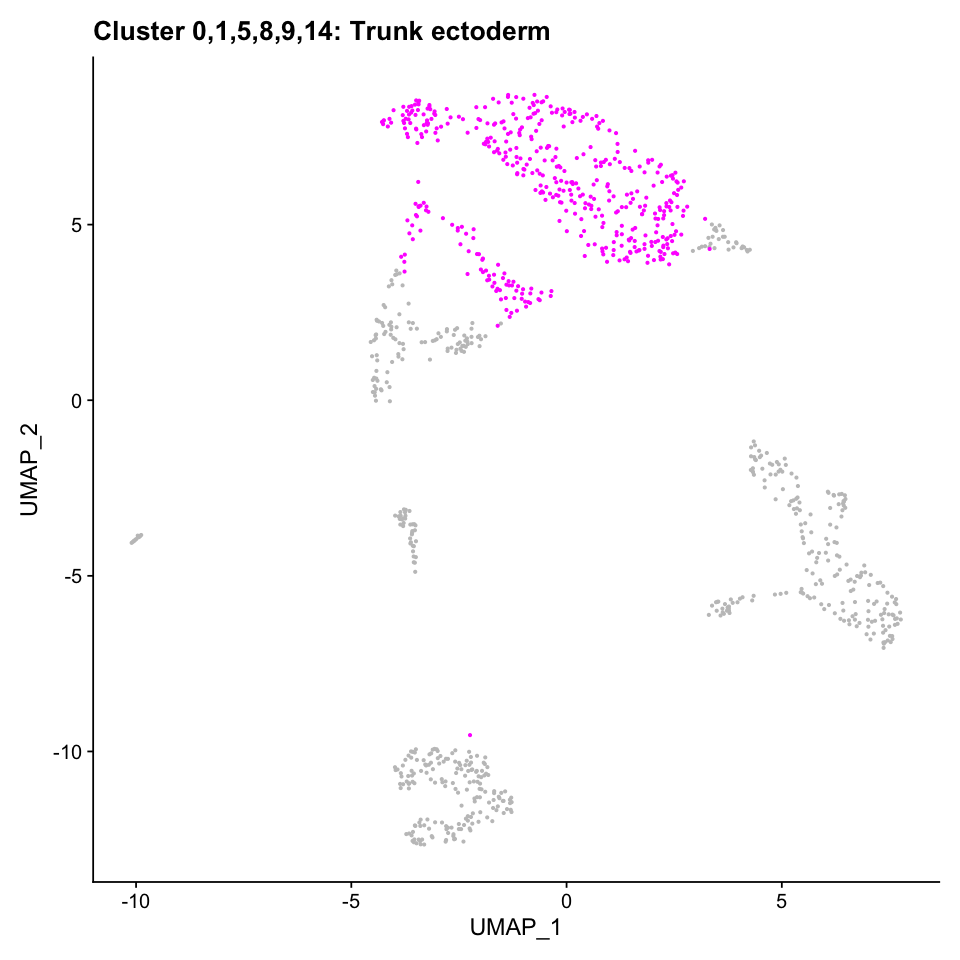

In [4]:
options(repr.plot.width=8, repr.plot.height=8)
highlight.cells <- WhichCells(seu_HQC,idents = c(0,1,5,8,9,14))
DimPlot(seu_HQC, reduction =  "umap", cells.highlight = highlight.cells, pt.size = 0.5, sizes.highlight = 0.5,
        cols.highlight = 'magenta', label = FALSE) + NoLegend() + ggtitle('Cluster 0,1,5,8,9,14: Trunk ectoderm')

In [5]:
seu.ecto <- subset(seu_HQC,idents = c(0,1,5,8,9,14))
seu.ecto

An object of class Seurat 
28877 features across 456 samples within 2 assays 
Active assay: SCT (11281 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [6]:
seu.ecto$all_cell_cluster <- seu.ecto$seurat_clusters

## Clustering and AP annotation
Num of cells < 500  
Skipping re-normalize

PC_ 1 
Positive:  SoxN, ths, sca, ImpL2, sog, brk, Tet, Toll-6, D, Meltrin 
	   esg, CG17724-Kdm4B-seq, Dl, Tollo, path, hth, E(spl)mgamma-HLH, Cys, rdx, pnt 
	   Trim9, pyr, siz, pros, l(1)sc, HnRNP-K, wb, slp1, mid, Pino 
Negative:  tup, mirr, ush, Ama, egr, emc, hbs, srp, Alk, Doc1 
	   CG45263, CG14427, peb, pnr, kay, Ance, net, cv-2, Dtg, lncRNA:CR43432 
	   dap, rst, Doc2, chrb, C15, Svil, Doc3, cno, btsz, rho 
PC_ 2 
Positive:  CG43355-sala, zfh1, Ilp4, CadN, twi, sna, hll, ltl, Cyp310a1, stumps 
	   Mef2, Ndae1, sprt, Tis11, Myc, NetA, Mes2, VepD, Nplp2, if 
	   htl, rib, NetB, disco, CG1673, fog, be, lncRNA:CR45361, CG11357, fkh 
Negative:  tsh, CG34224, Brd, E(spl)malpha-BFM, hth, Antp, ImpL2, E(spl)mgamma-HLH, ths, aop 
	   pnr, Lac, esg, Tom, dpp, blot, E(spl)m2-BFM, E(spl)m7-HLH, E(spl)m5-HLH, Trim9 
	   CG13217, Ubx, sdt, ci, mew, BobA, CG15480, E(spl)mdelta-HLH, Btk29A, lncRNA:CR43432 
PC_ 3 
Positive:  vn, sog, D, SoxN, brk, pnt, sca, vnd, fend, esg 
	   CG17724-Kdm4B-s

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 456
Number of edges: 15895

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6916
Number of communities: 5
Elapsed time: 0 seconds


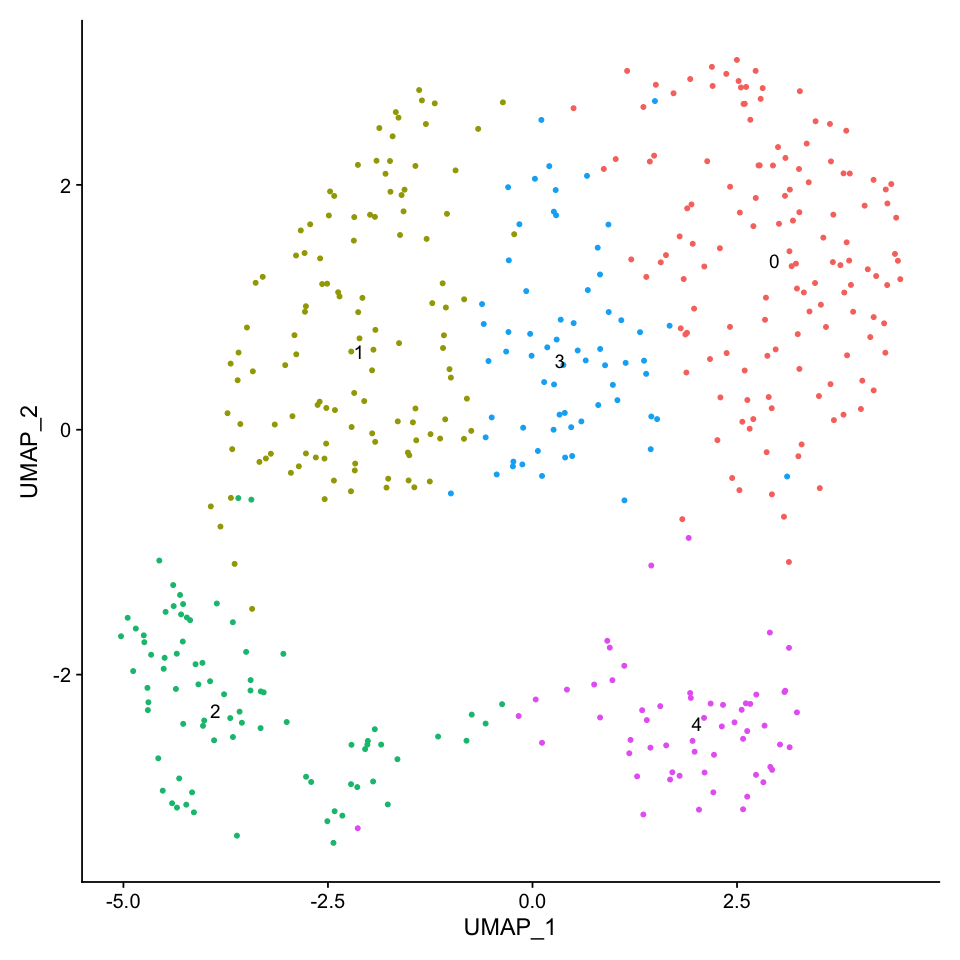

In [7]:
options(repr.plot.width=8, repr.plot.height=8)
seu.ecto <- RunPCA(seu.ecto)
seu.ecto <- RunUMAP(seu.ecto, dims = 1:30)
seu.ecto <- FindNeighbors(seu.ecto, dims = 1:30)
seu.ecto <- FindClusters(seu.ecto)
DimPlot(seu.ecto, reduction = 'umap', label = T) + NoLegend()

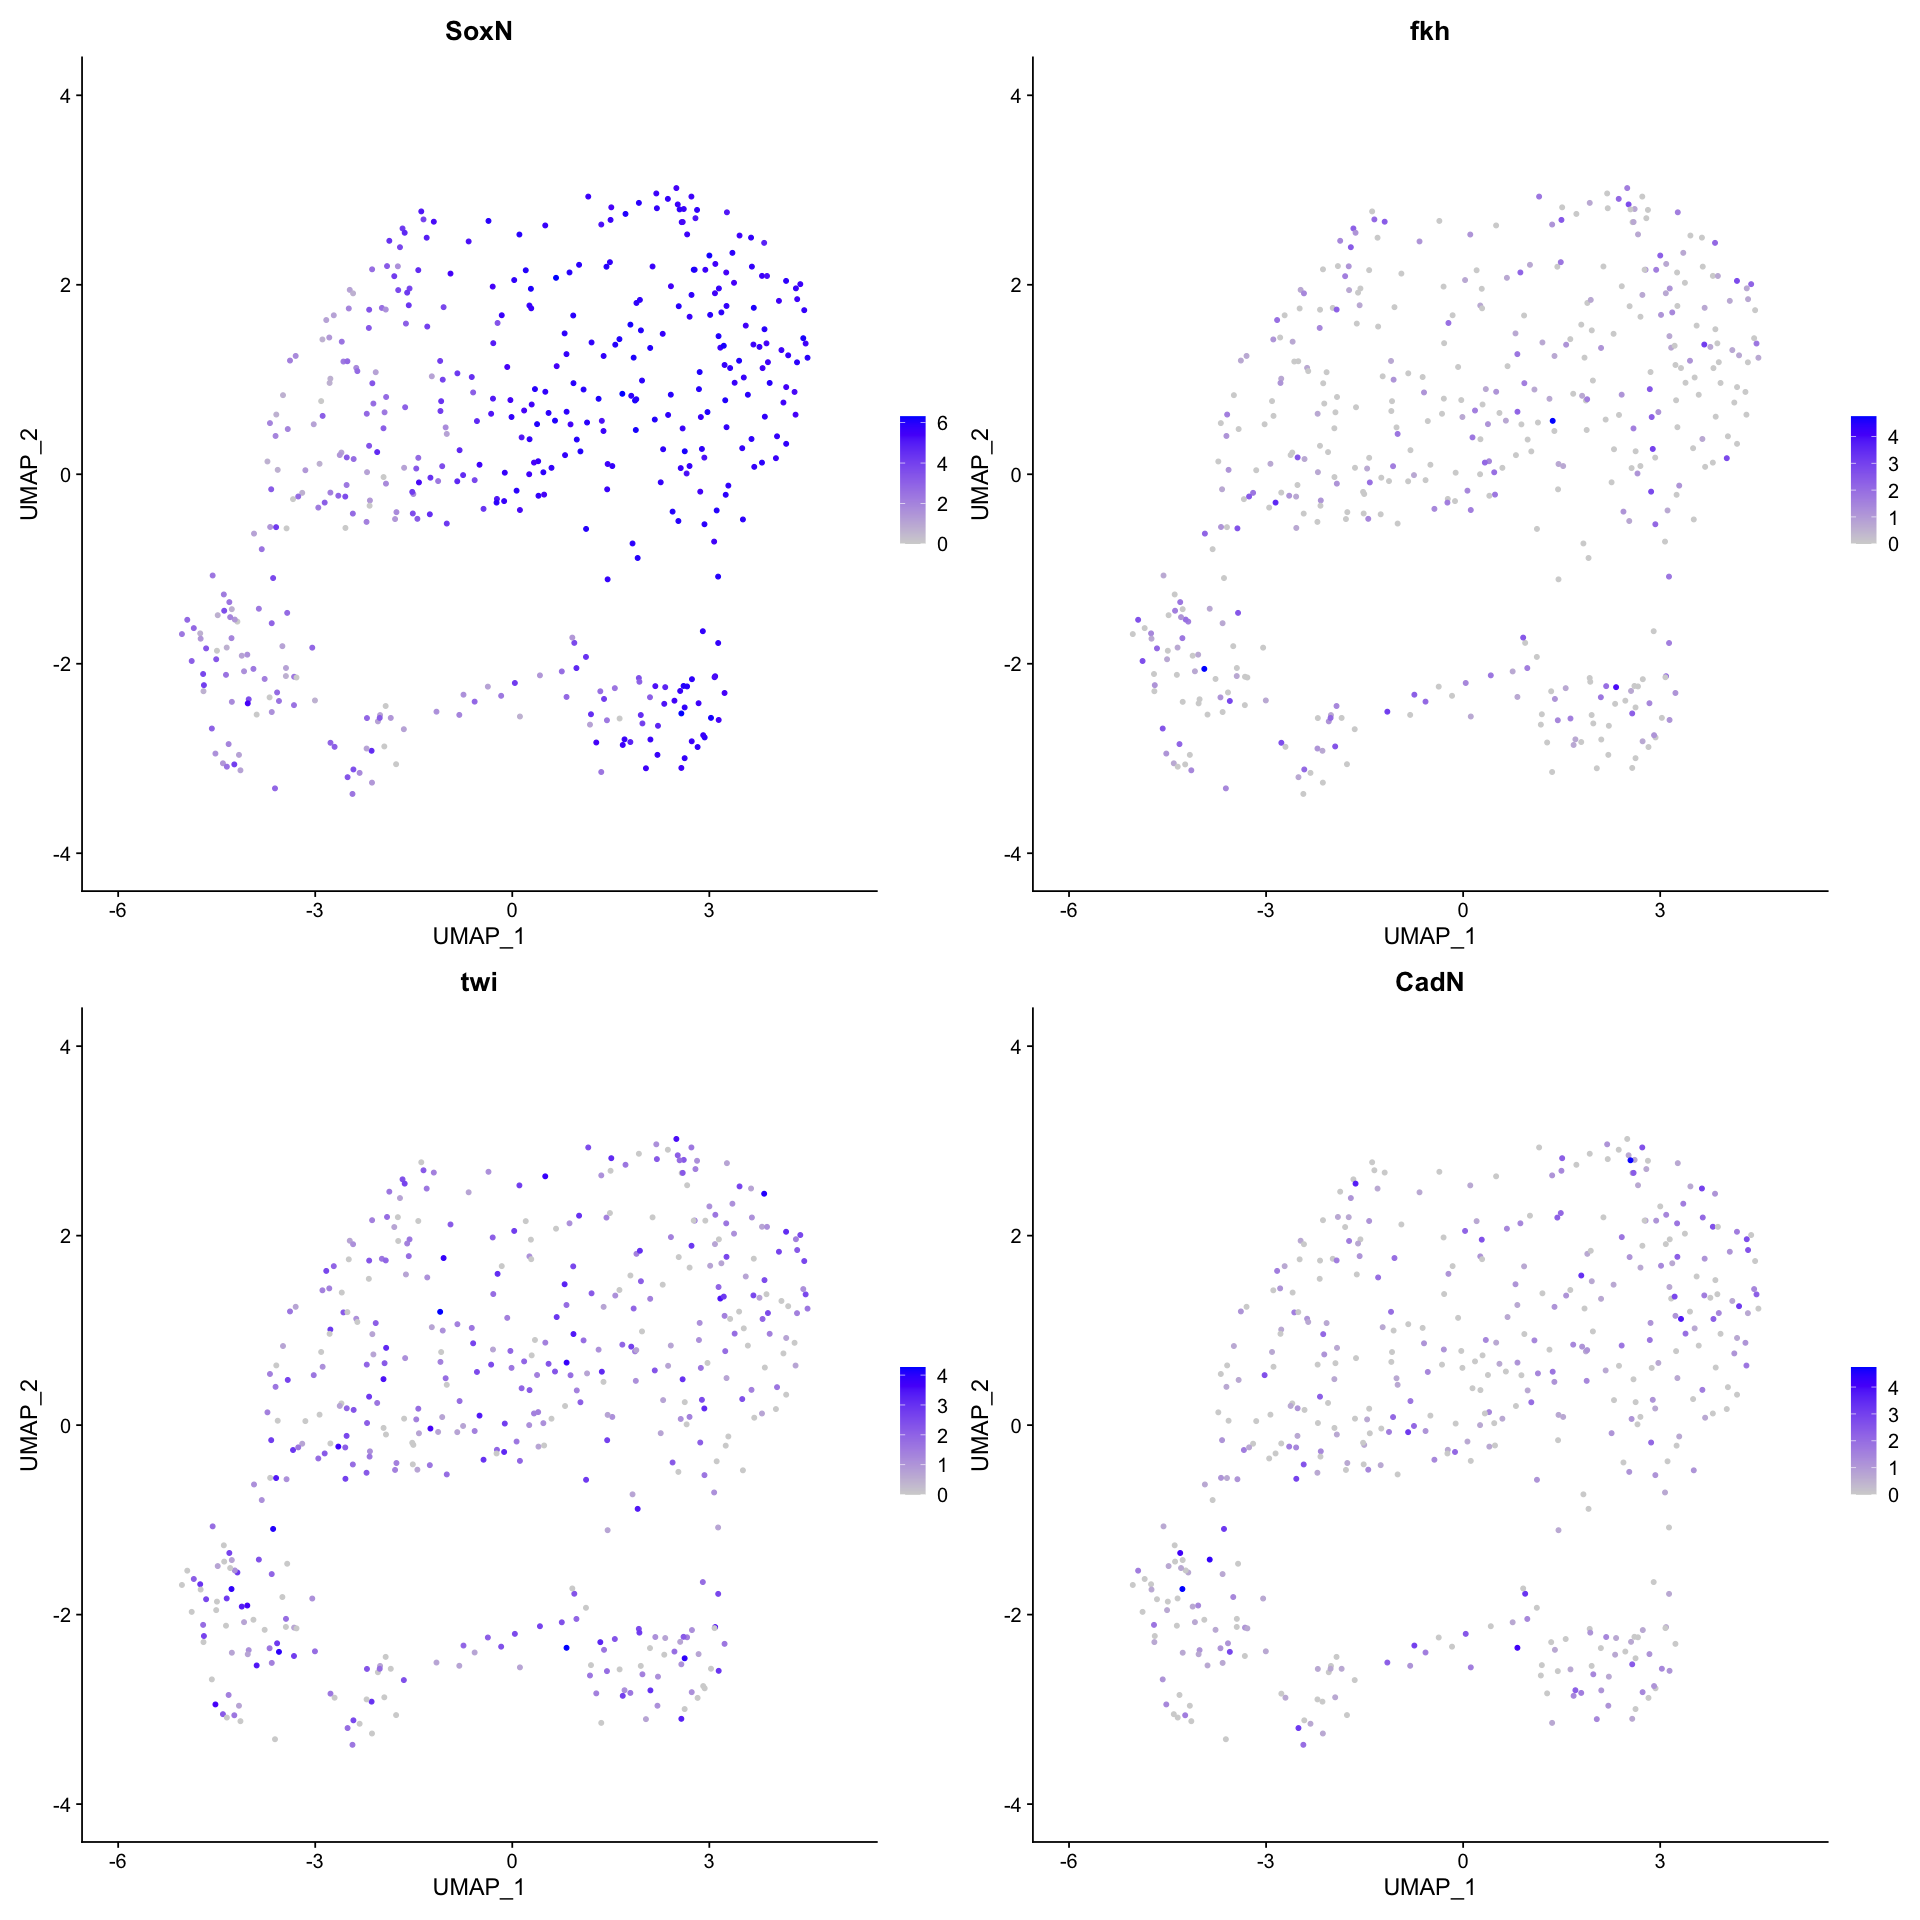

In [8]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu.ecto, reduction = "umap", features = c('SoxN','fkh','twi','CadN'))

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 456
Number of edges: 15895

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5466
Number of communities: 8
Elapsed time: 0 seconds


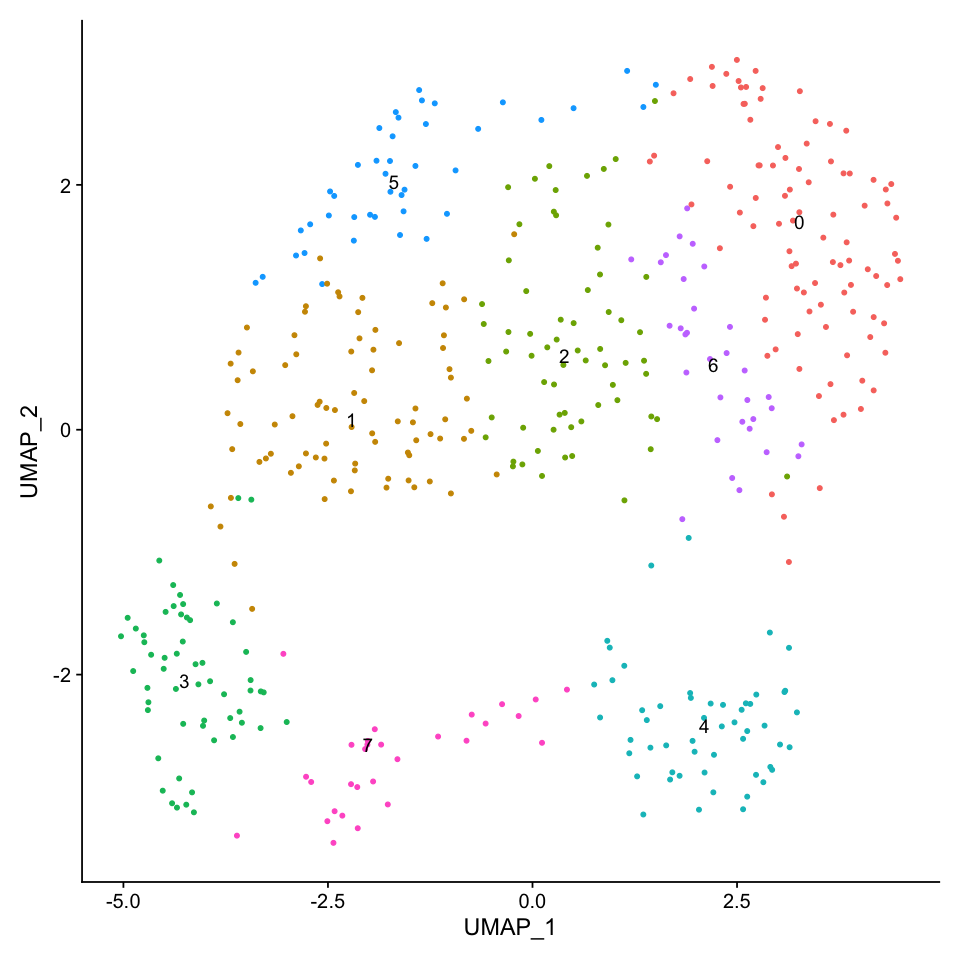

In [9]:
options(repr.plot.width=8, repr.plot.height=8)
seu.ecto <- FindClusters(seu.ecto, resolution = 1.5)
DimPlot(seu.ecto, reduction = 'umap', label = TRUE) + NoLegend()

In [10]:
all.markers.ecto <- FindAllMarkers(object = seu.ecto, only.pos = TRUE)
nrow(all.markers.ecto)
all.markers.ecto.top10 <- all.markers.ecto %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.ecto.top10)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7



[1] 1530

[1] 80

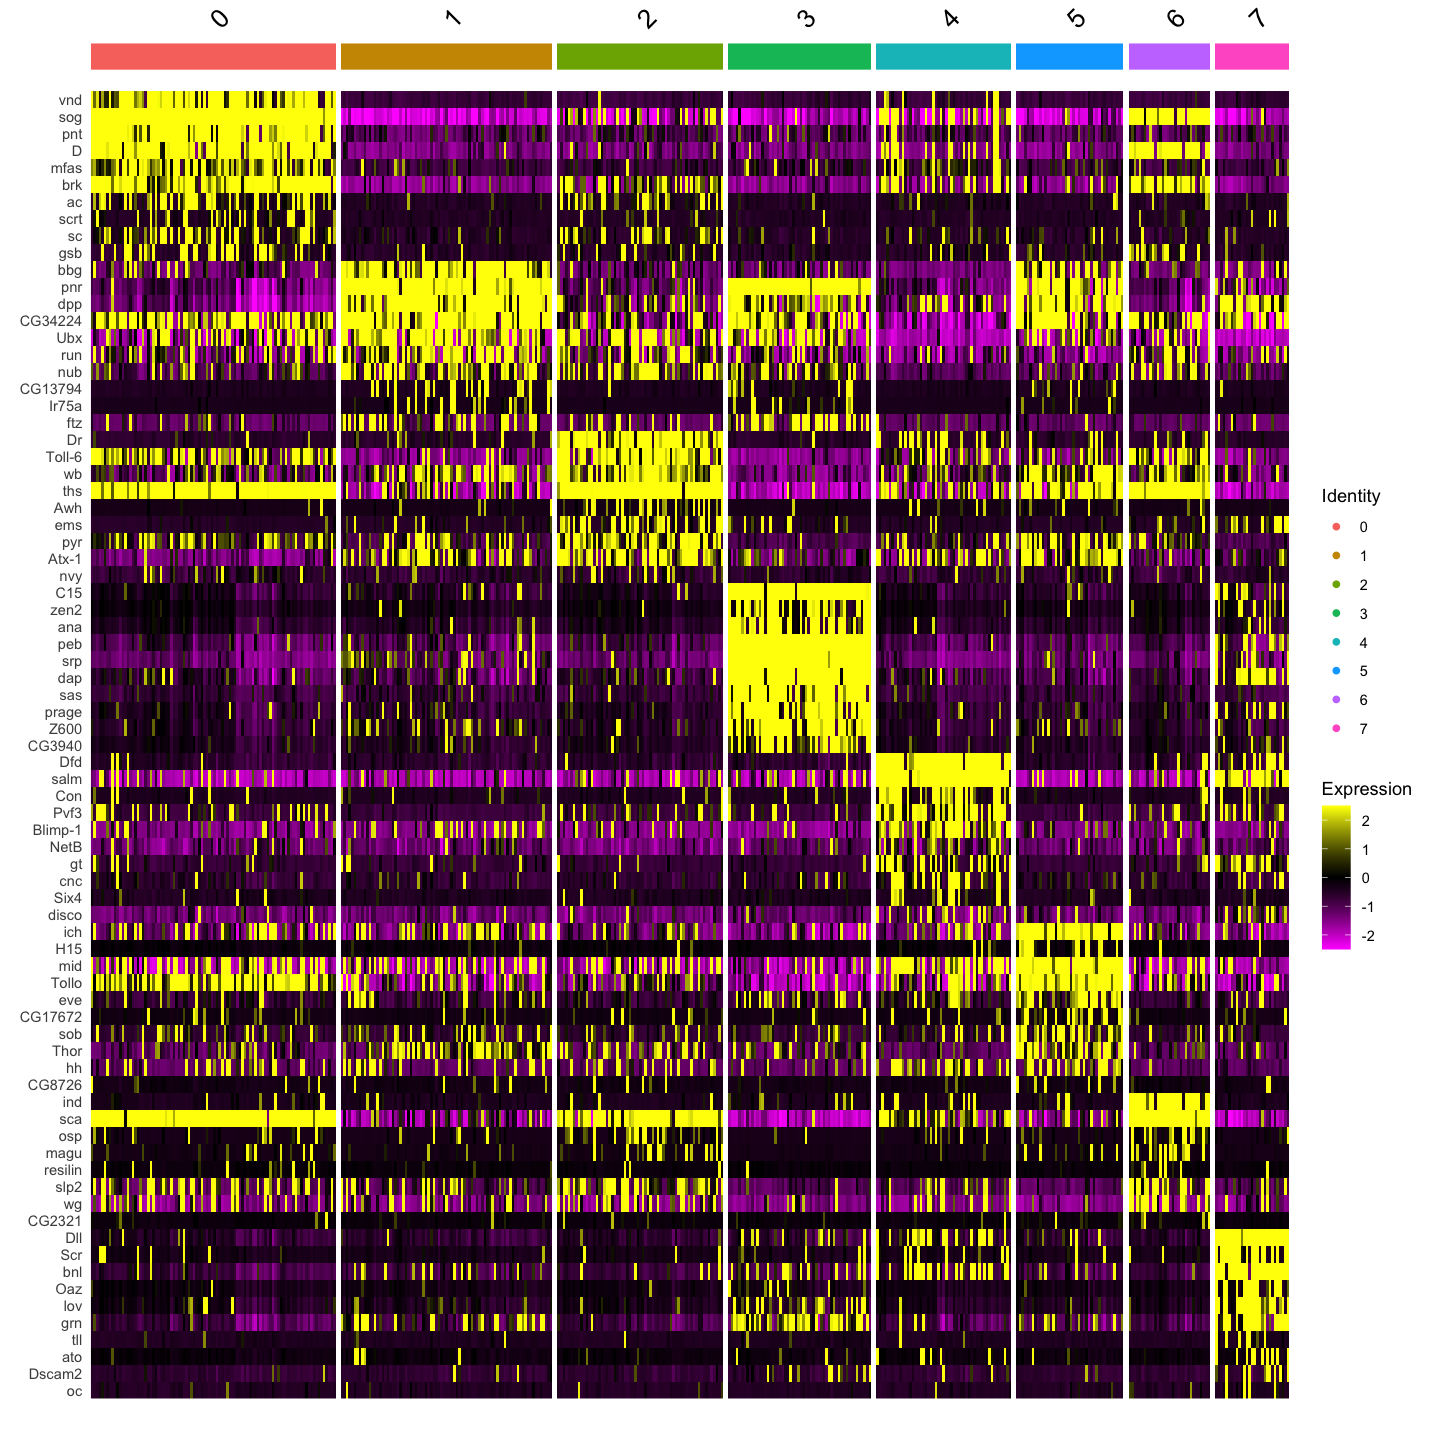

In [11]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu.ecto, features = c(all.markers.ecto.top10$gene))

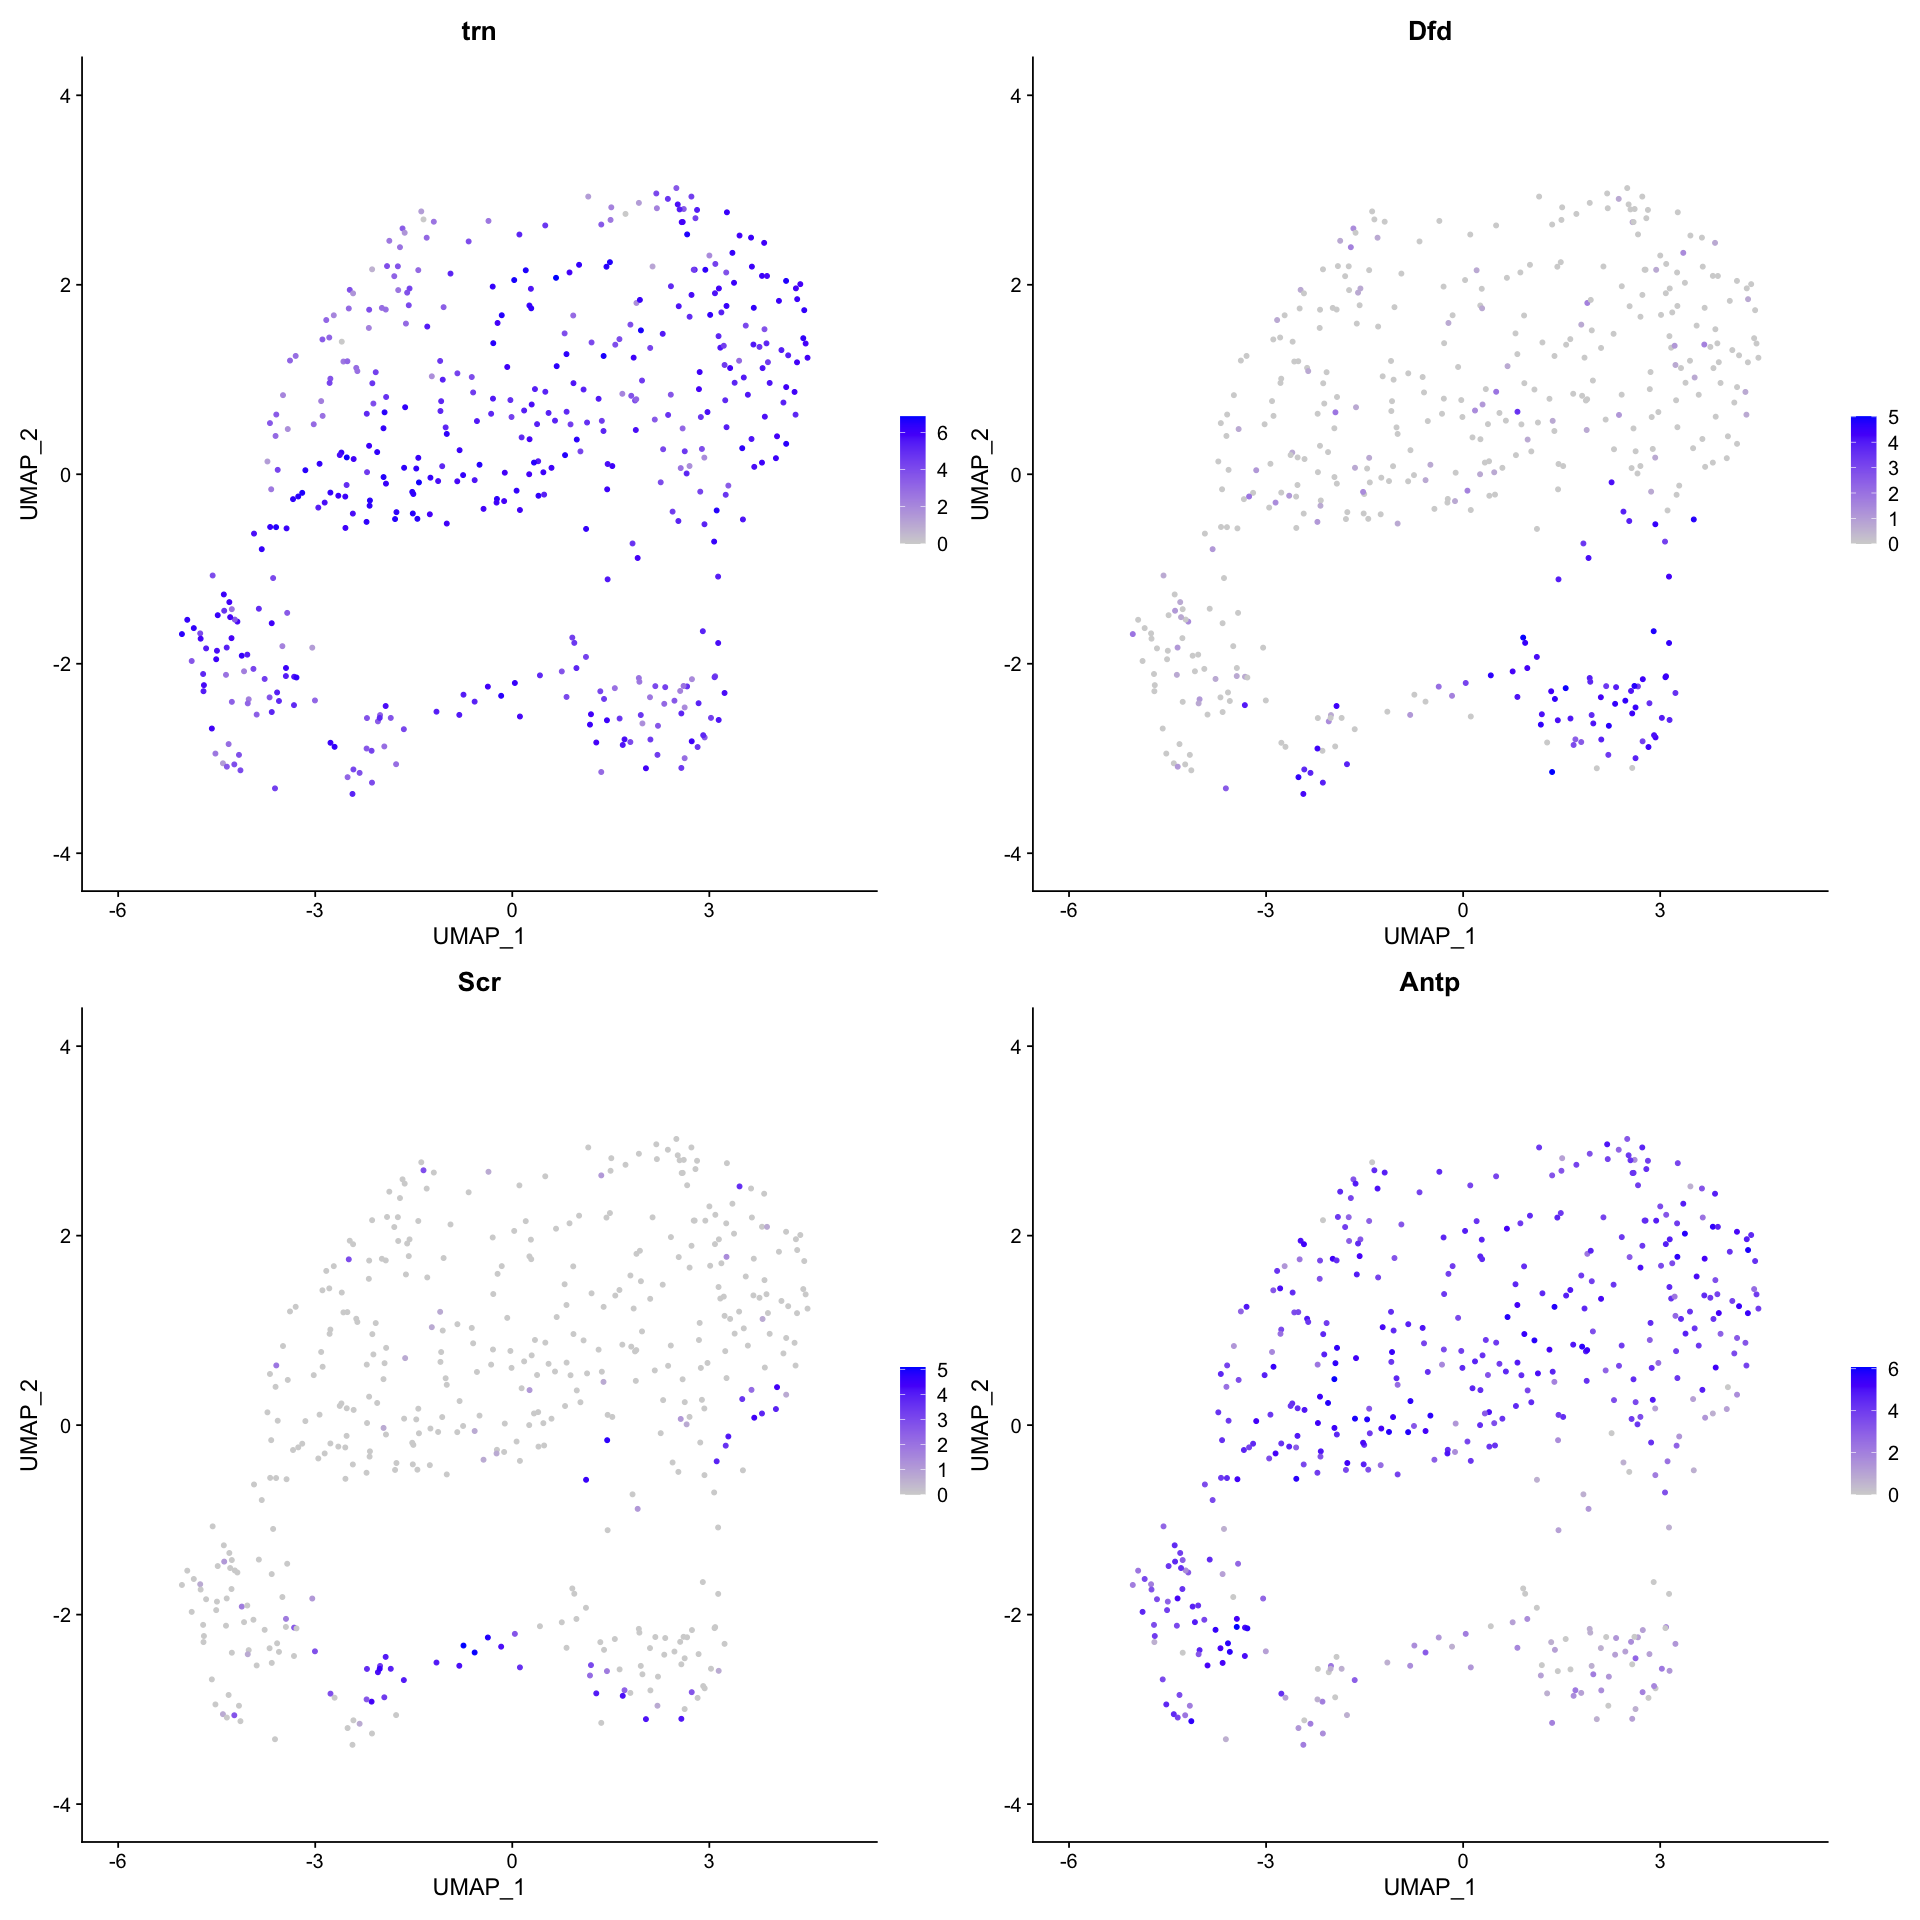

In [12]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu.ecto, reduction = "umap", features = c('trn','Dfd','Scr','Antp'))

Scr+/Dfd+ were not separated

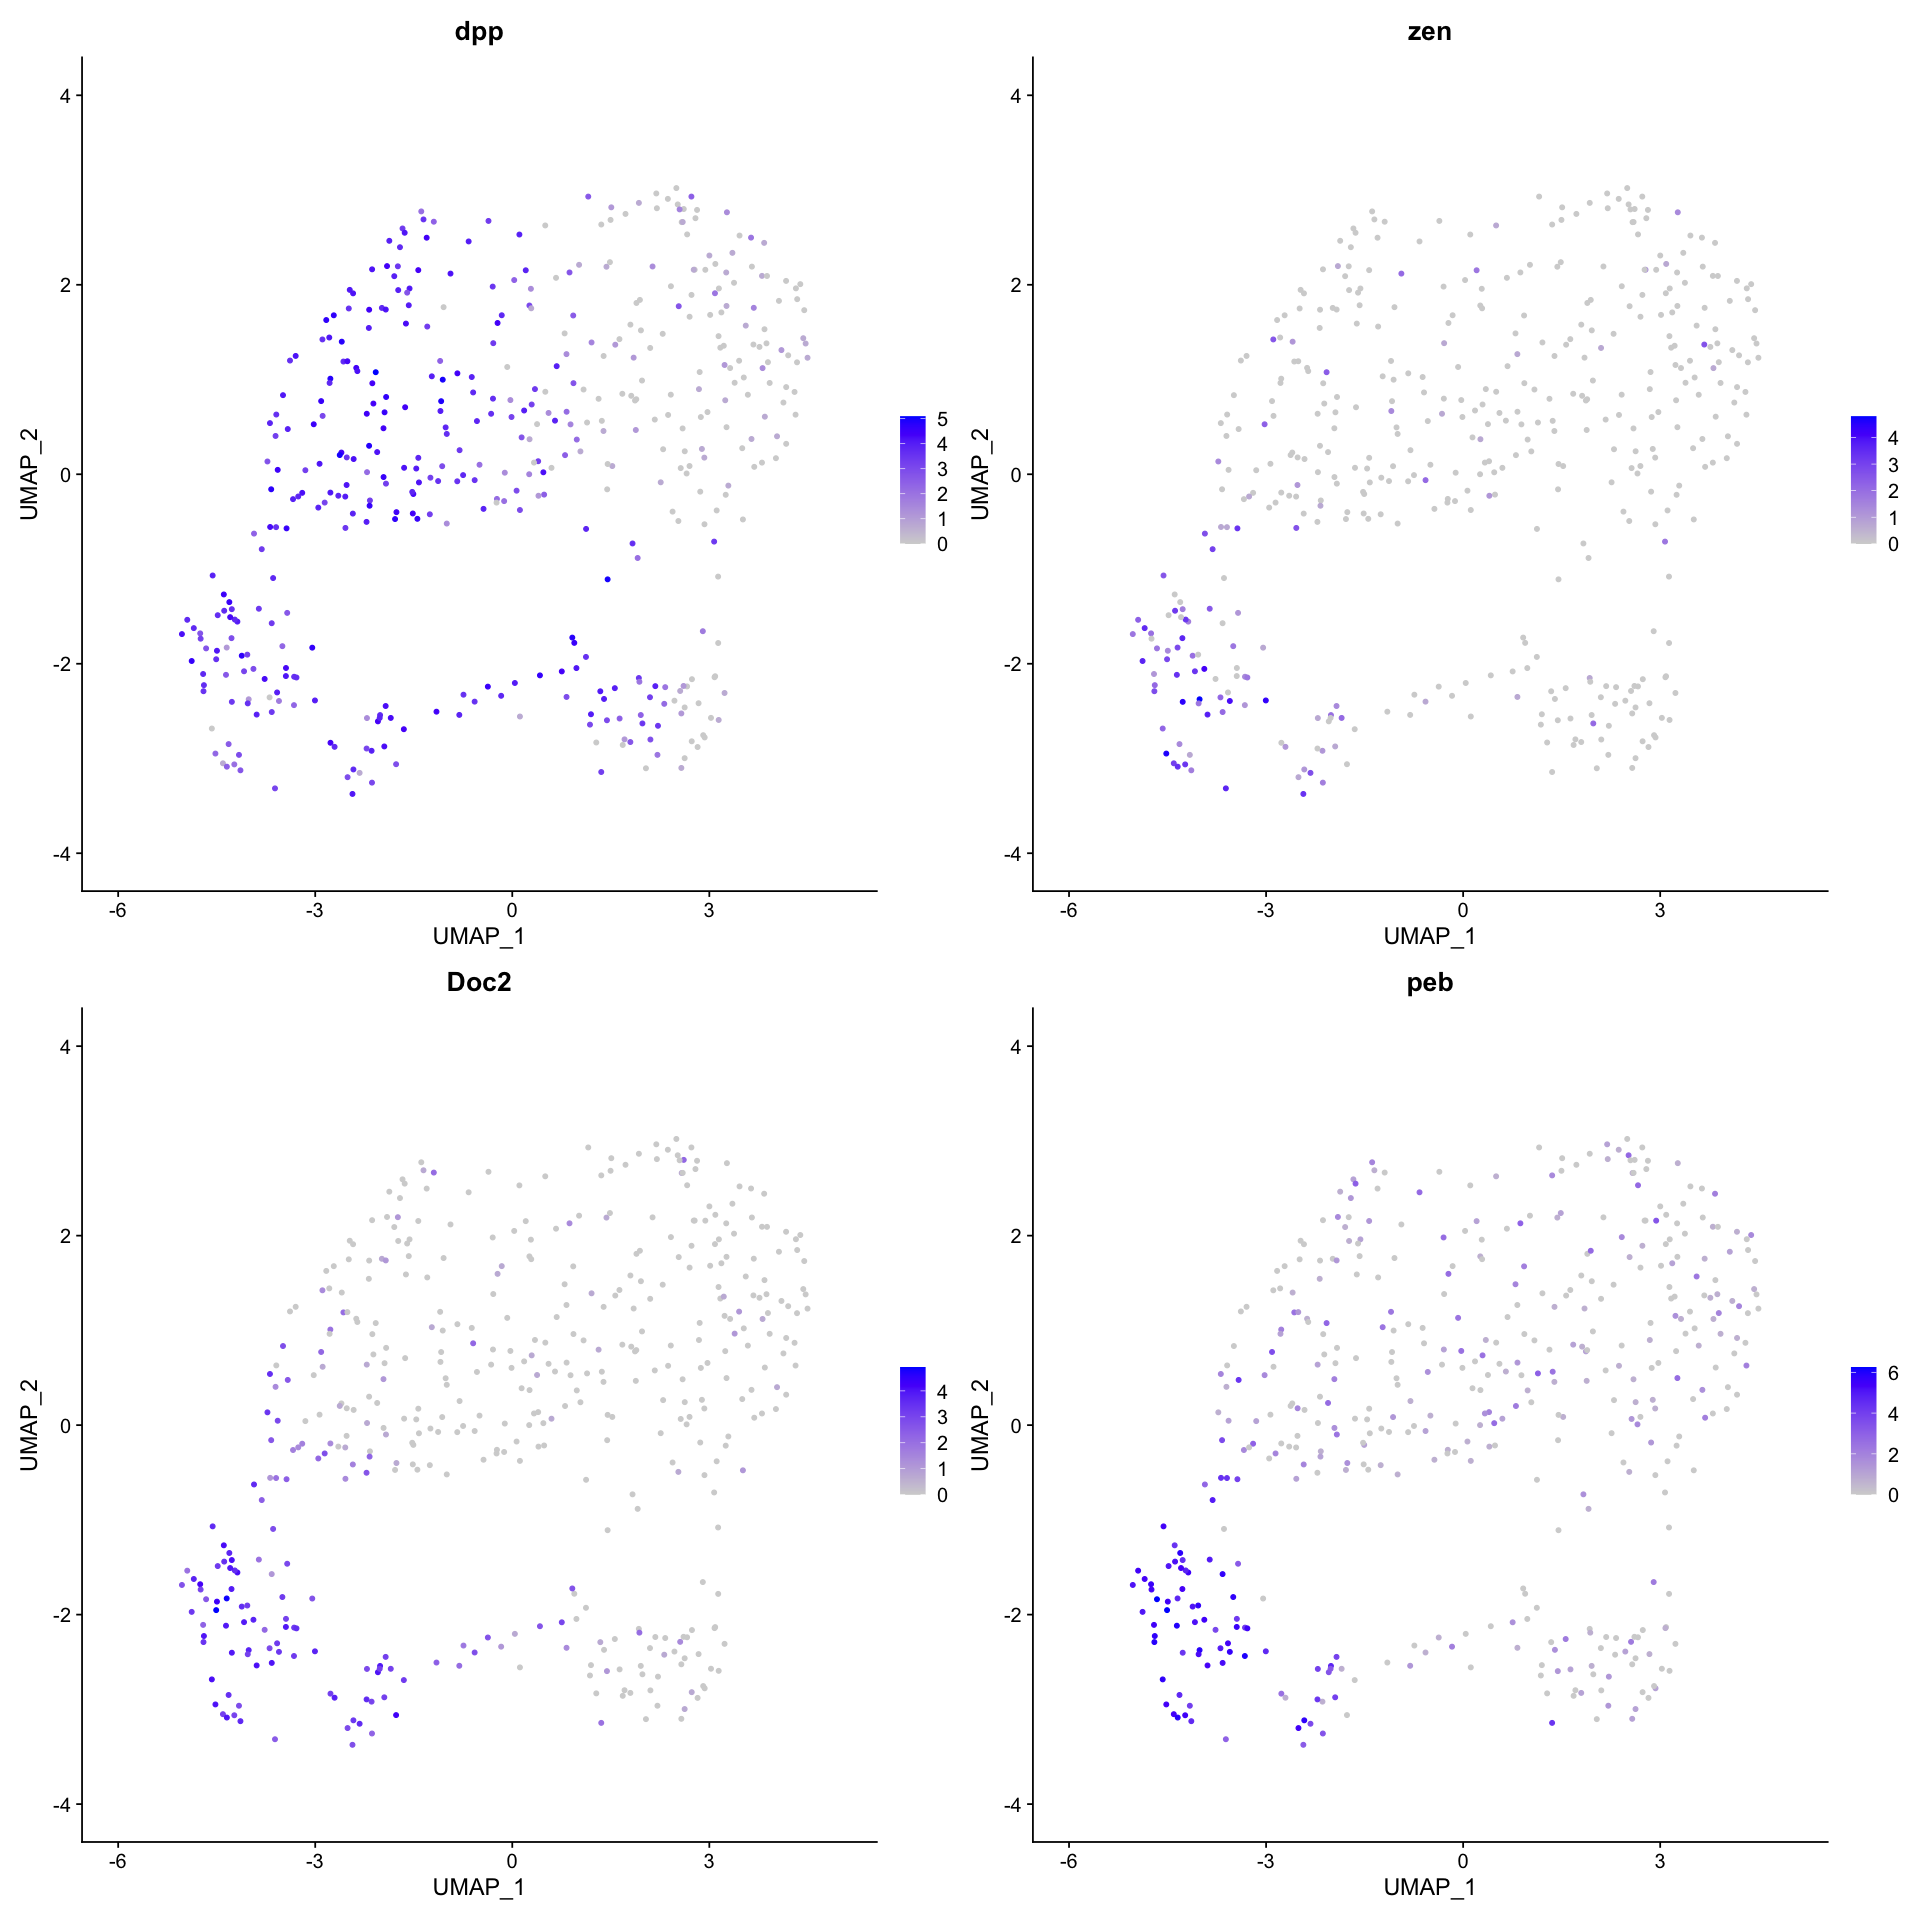

In [13]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu.ecto, reduction = "umap", features = c('dpp','zen','Doc2','peb'))

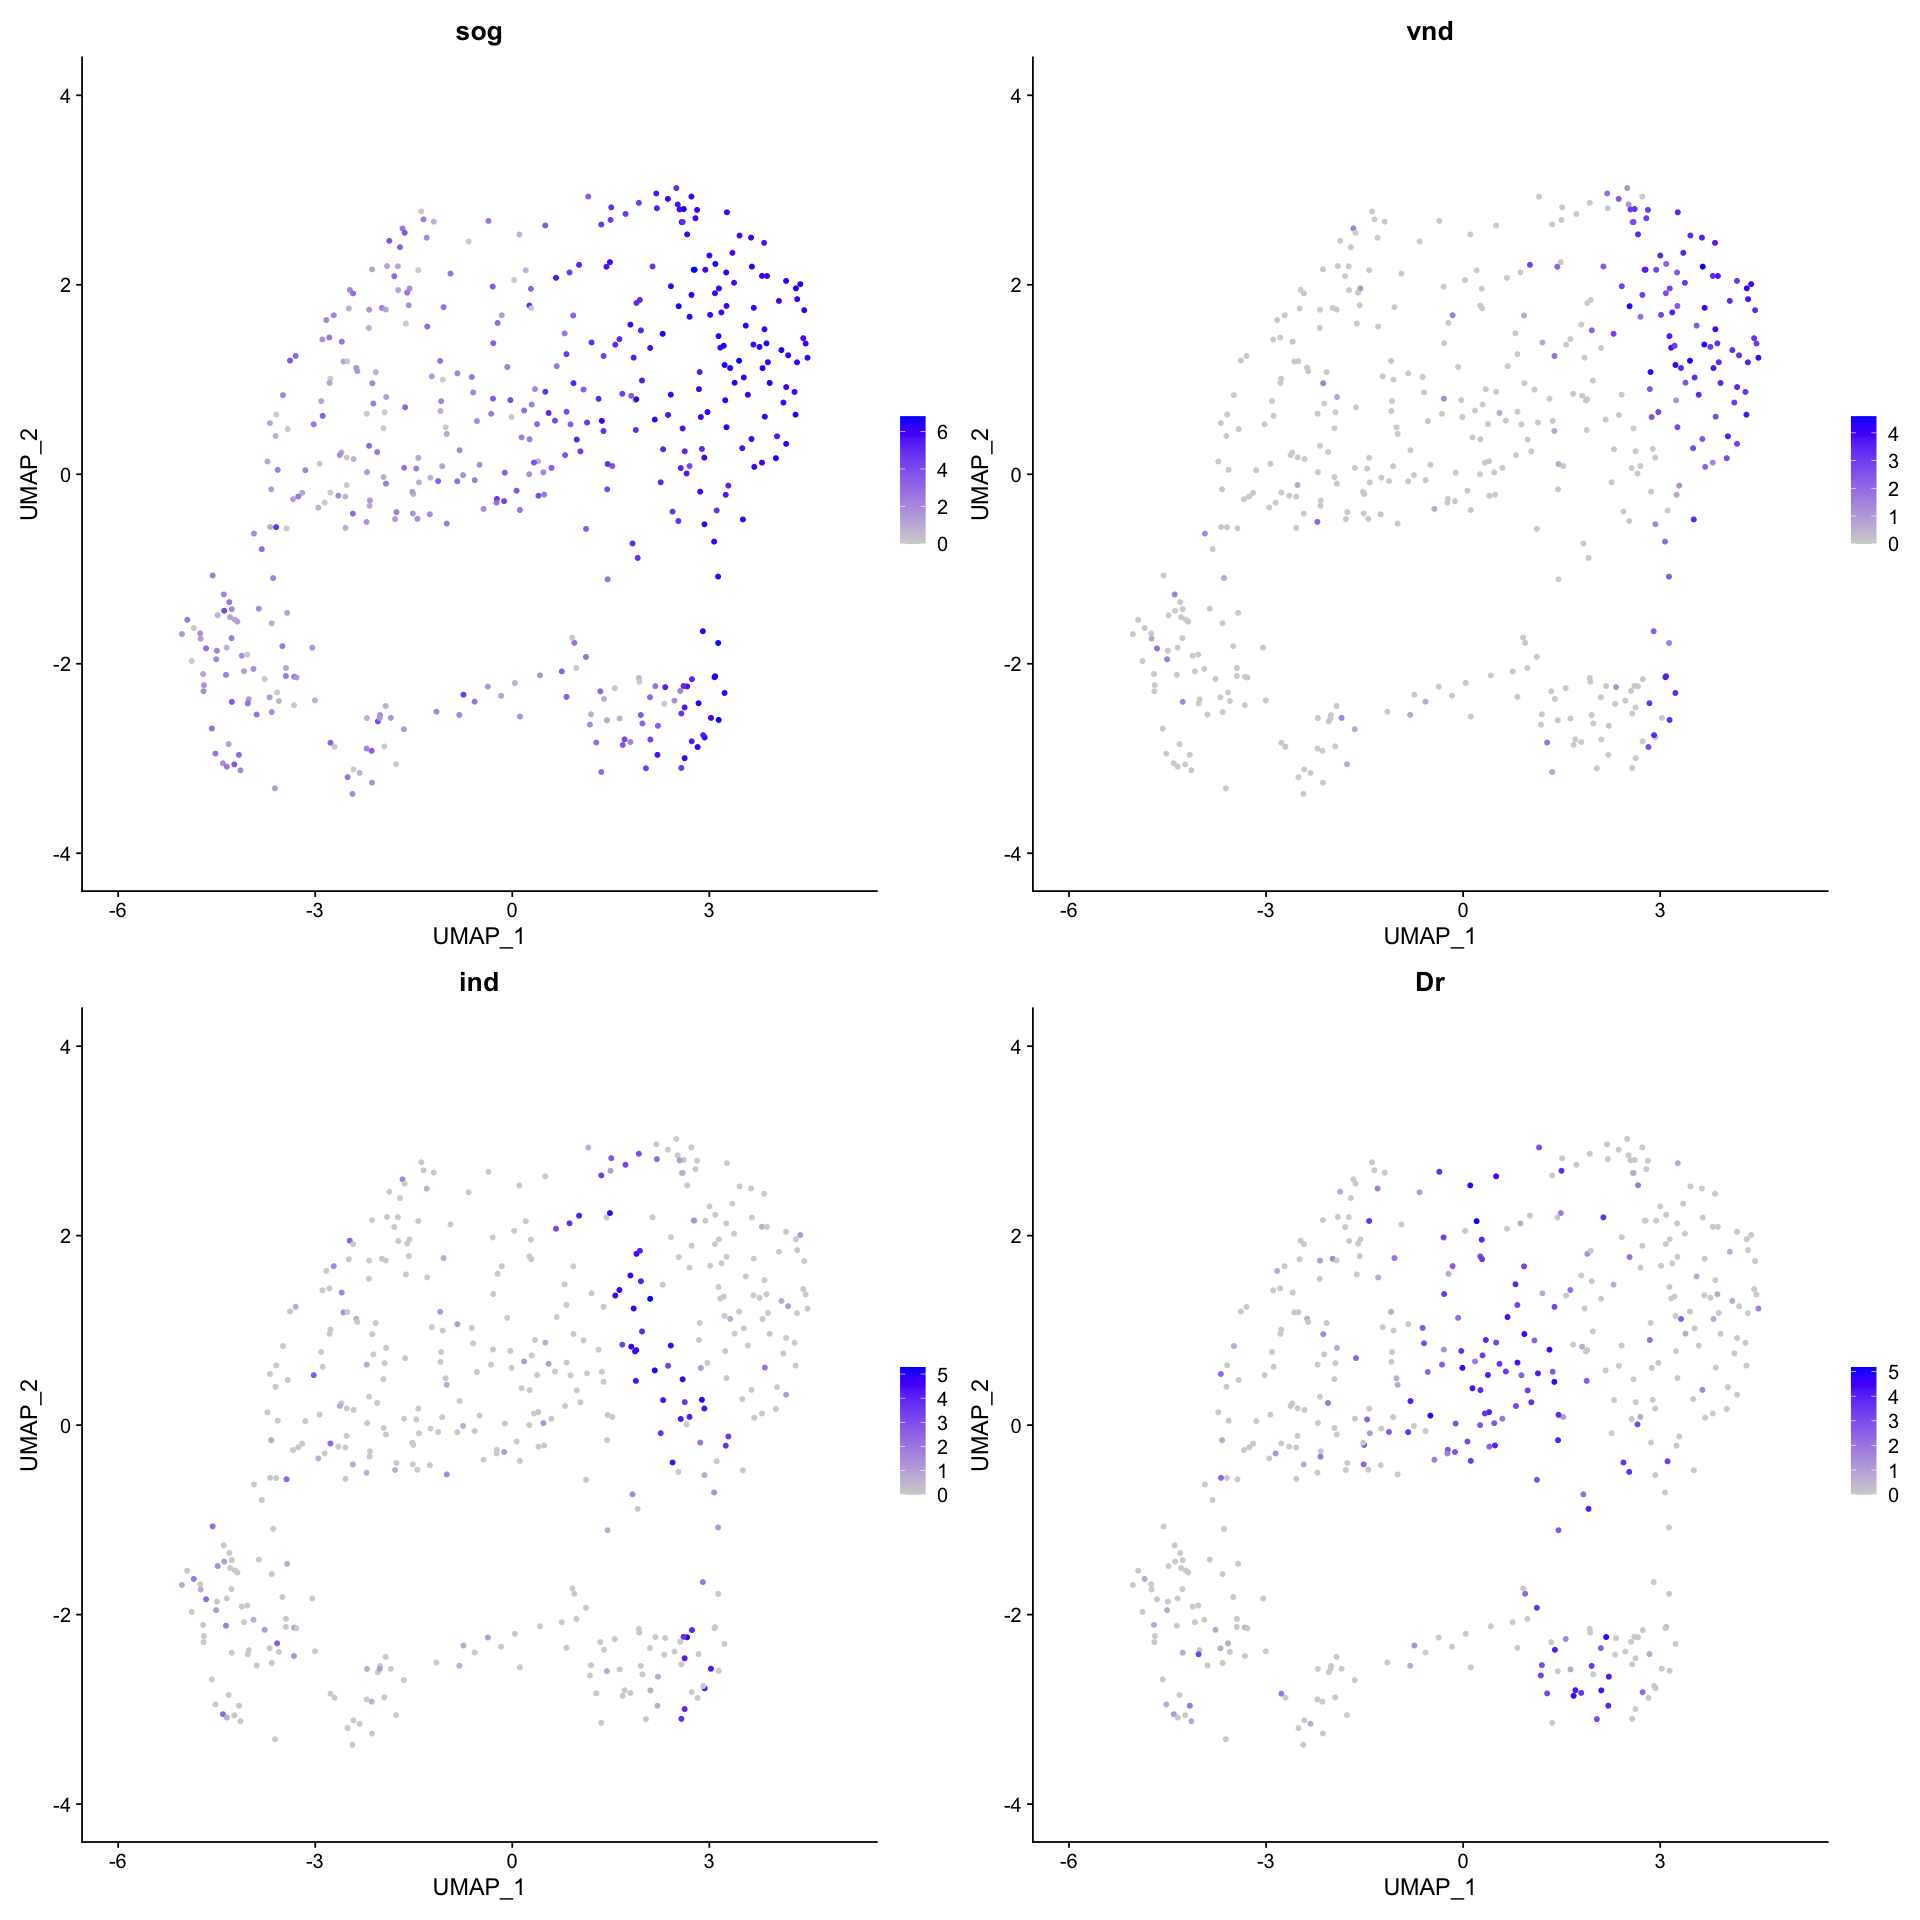

In [14]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu.ecto, reduction = "umap", features = c('sog','vnd','ind','Dr'))

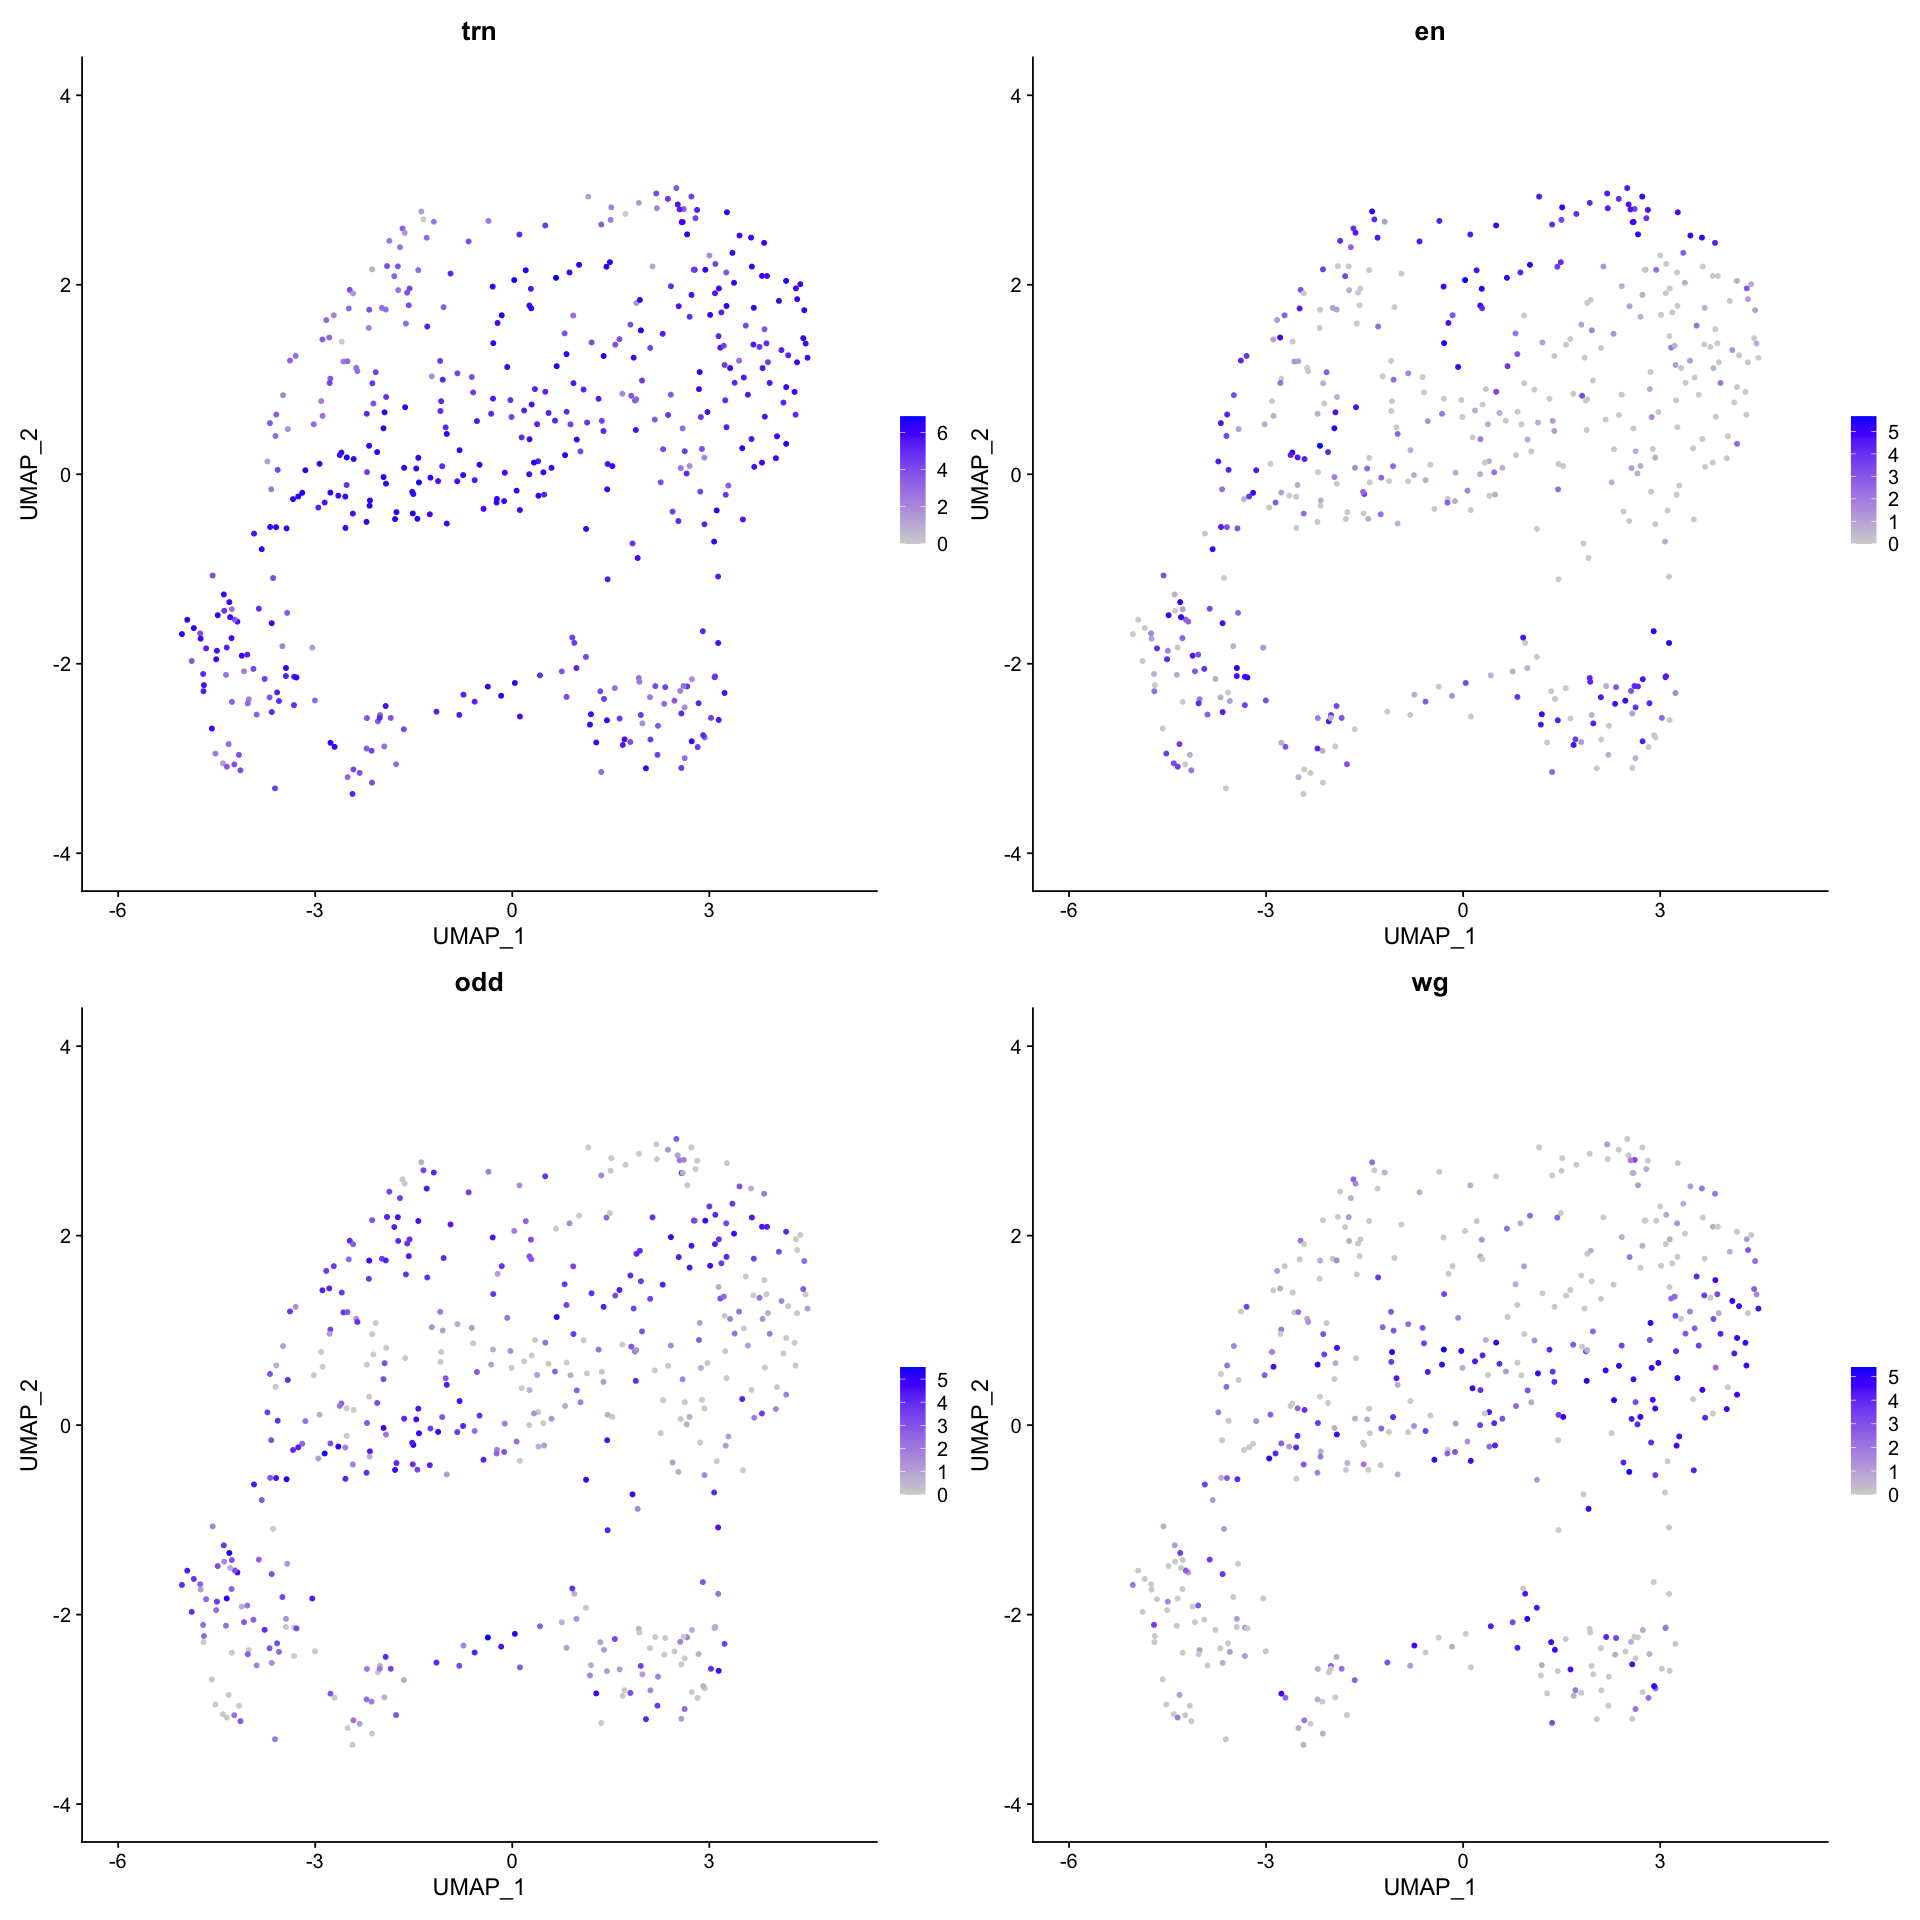

In [15]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu.ecto, reduction = "umap", features = c('trn','en','odd','wg'))

trn+/trn- cells were mixed

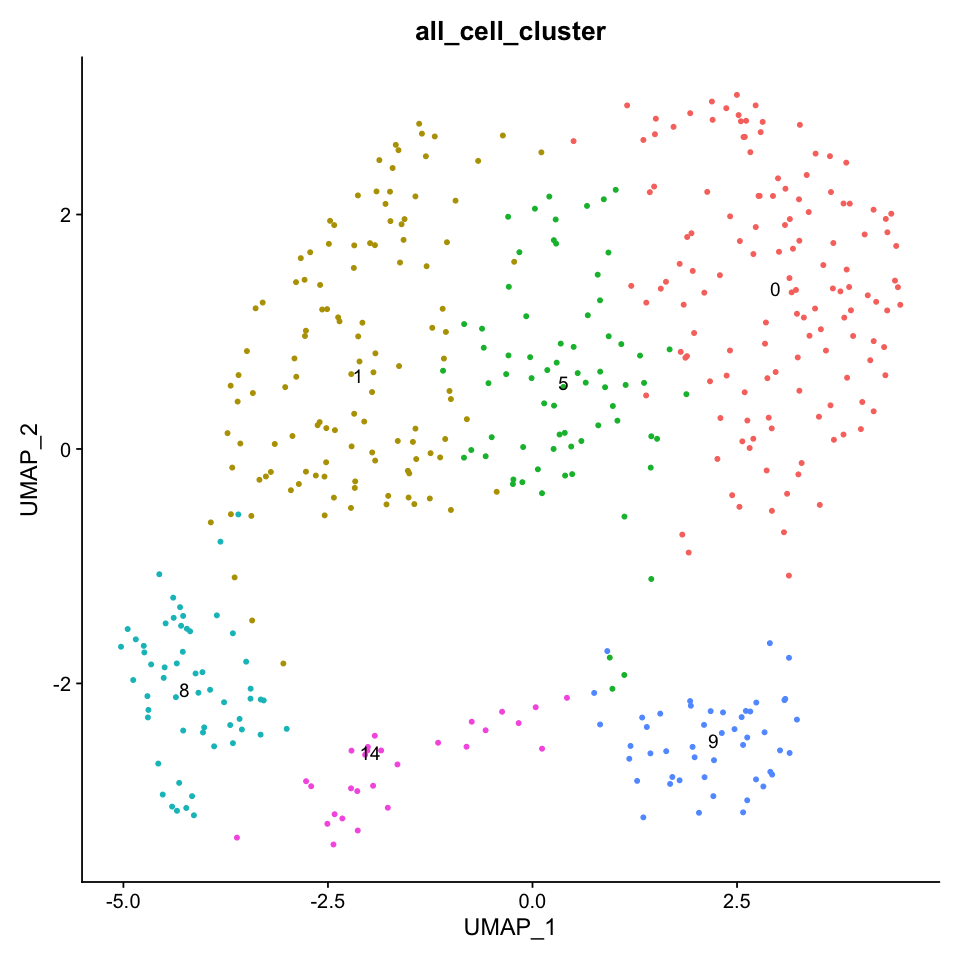

In [16]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.ecto, reduction = 'umap', label = TRUE, group.by = 'all_cell_cluster') + NoLegend()

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 456
Number of edges: 15895

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5466
Number of communities: 8
Elapsed time: 0 seconds


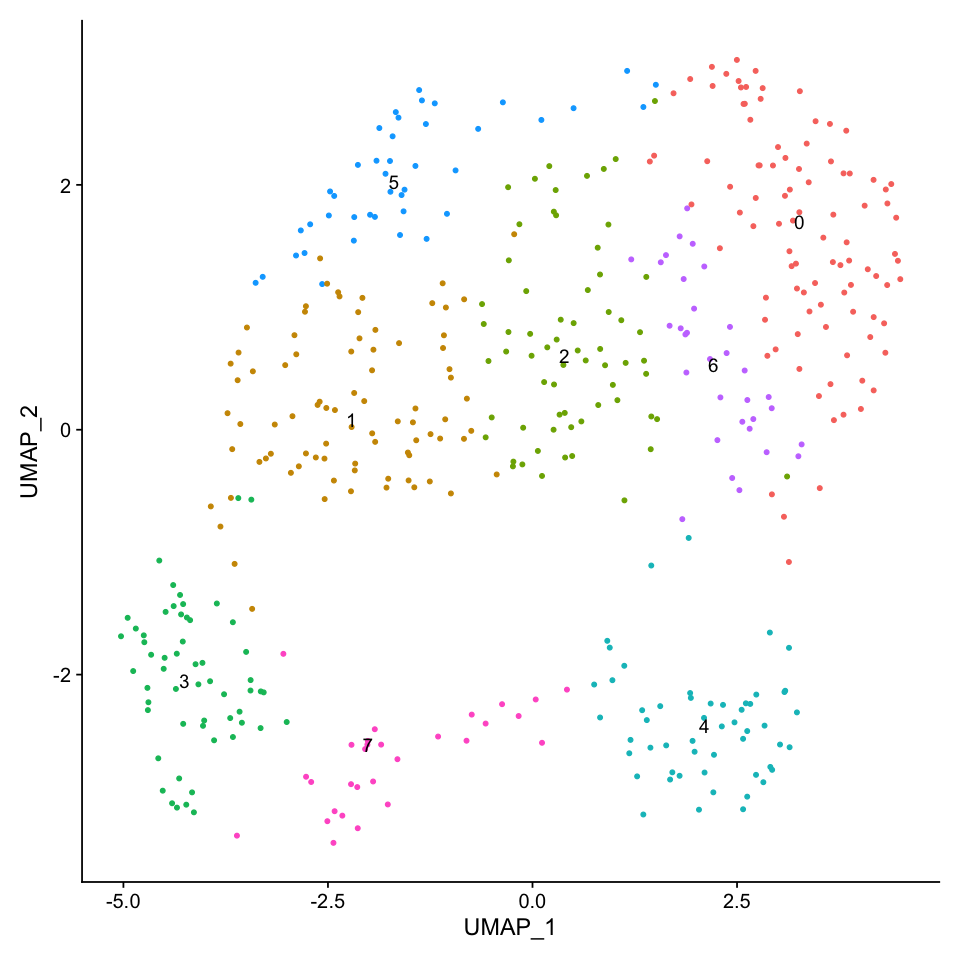

In [17]:
options(repr.plot.width=8, repr.plot.height=8)
seu.ecto <- FindClusters(seu.ecto, resolution = 1.5)
DimPlot(seu.ecto, reduction = 'umap', label = TRUE) + NoLegend()

In [18]:
manual_id <- as.data.frame(seu.ecto$seurat_clusters)
colnames(manual_id) <- c('manual_ID')
head(manual_id)

manual_id$manual_ID = dplyr::recode(manual_id$manual_ID, 
                                     "0"="abdominal", 
                                     "1"="abdominal",
                                     "2"="abdominal",
                                     "3"="amnioserosa",
                                     "4"="PS1_and_PS2", #Dfd+ or Scr+
                                     "5"="abdominal",
                                     "6"="abdominal",
                                     "7"="PS1_and_PS2" #Dfd+ or Scr+
                                    )
head(manual_id)

manual_ID
batch1_col1GACTCA 2        
batch1_col1GTCTAC 7        
batch1_col1TAGTCG 3        
batch1_col2TCTCAG 2        
batch1_col3GCTGAT 3        
batch1_col3GTGCAT 4

manual_ID  
batch1_col1GACTCA abdominal  
batch1_col1GTCTAC PS1_and_PS2
batch1_col1TAGTCG amnioserosa
batch1_col2TCTCAG abdominal  
batch1_col3GCTGAT amnioserosa
batch1_col3GTGCAT PS1_and_PS2

In [19]:
seu.ecto$AP_ID <- manual_id$manual_ID

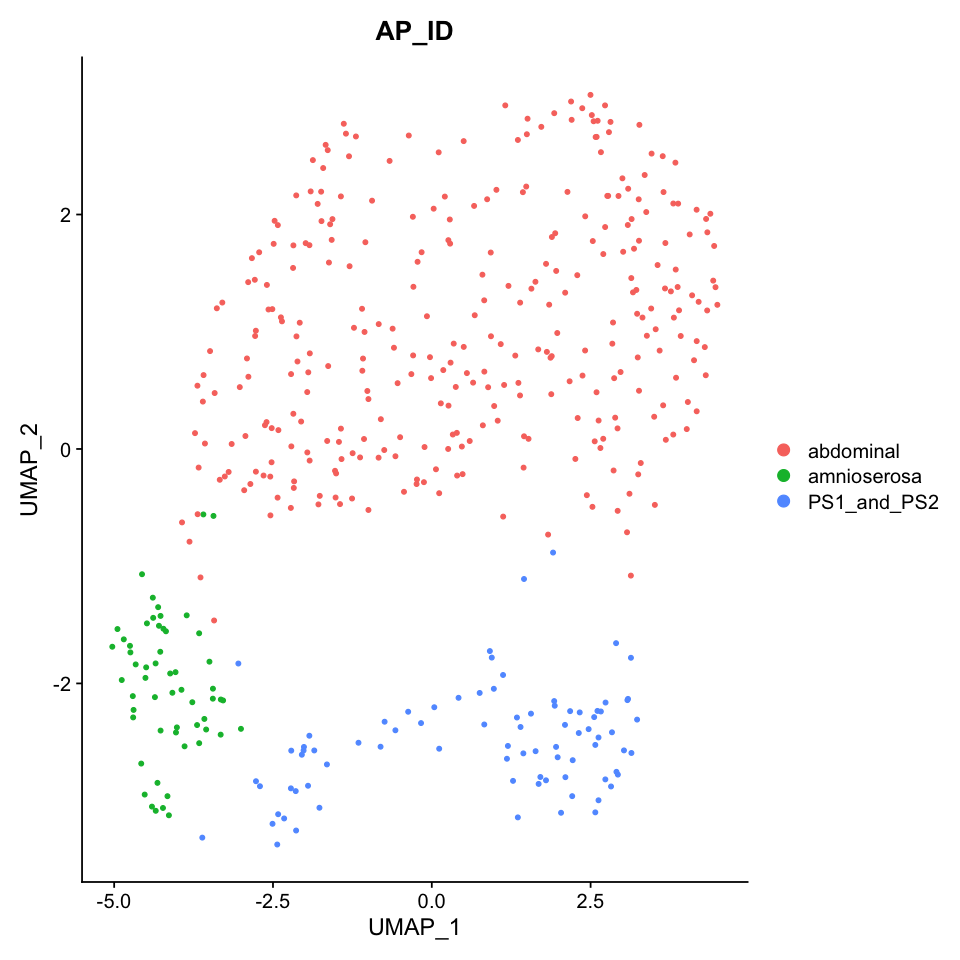

In [20]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.ecto, reduction = 'umap', group.by = 'AP_ID')

## Annotation by DV genes

In [21]:
DV_genes <- c("rho", "vnd", "pnt", "ind", "sog", "SoxN", "brk", "dpp", "Egfr", "vn", "pnt",
              "Atx-1", "egr", "cv-2", "Doc1", "Ance", "Dr", "emc", "cic",
              "mirr", "ush", "Ama", "bbg", "tup", "zen", "Doc2", "Z600", "C15", "peb",
             "Dtg", "CG13653", "Doc3", "dap","srp", "stg")

In [22]:
norm.count.ecto <- GetAssayData(seu.ecto)
norm.count.ecto.dv.genes <- as.matrix(norm.count.ecto[DV_genes,])
head(norm.count.ecto.dv.genes)

batch1_col1GACTCA batch1_col1GTCTAC batch1_col1TAGTCG batch1_col2TCTCAG
rho  3.465736          3.6109179         3.951244          3.367296         
vnd  0.000000          0.0000000         0.000000          0.000000         
pnt  1.791759          2.3025851         2.079442          1.098612         
ind  0.000000          0.6931472         1.945910          0.000000         
sog  2.397895          0.6931472         0.000000          4.262680         
SoxN 5.135798          2.8332133         2.772589          6.063785         
     batch1_col3GCTGAT batch1_col3GTGCAT batch1_col4GAGCTA batch1_col4GCTGAT
rho  3.912023          2.772589          2.7725887         5.111988         
vnd  1.609438          0.000000          0.0000000         0.000000         
pnt  1.386294          0.000000          0.6931472         1.098612         
ind  0.000000          0.000000          0.0000000         0.000000         
sog  2.079442          1.945910          0.6931472         1.386294         
SoxN 2.197225          1.098612          3.2958369         2.890372         
     batch1_col4TACGAG batch1_col5CACGTA ⋯ batch4_col17ATGCTC
rho  3.828641          1.945910          ⋯ 2.708050          
vnd  2.995732          0.000000          ⋯ 2.397895          
pnt  5.117994          0.000000          ⋯ 2.484907          
ind  0.000000          0.000000          ⋯ 0.000000          
sog  6.548219          2.639057          ⋯ 6.380123          
SoxN 5.834811          5.308268          ⋯ 5.497168          
     batch4_col17CGATGT batch4_col17GTGCAT batch4_col17TCACGT
rho  0.000000           0.000000           5.075174          
vnd  0.000000           0.000000           0.000000          
pnt  1.386294           2.197225           1.791759          
ind  3.688879           0.000000           1.098612          
sog  5.087596           1.386294           1.386294          
SoxN 6.146329           1.098612           3.178054          
     batch4_col18ATCAGC batch4_col18CAGATC batch4_col19ACATGC
rho  1.791759           0.6931472          0.6931472         
vnd  0.000000           0.0000000          0.0000000         
pnt  2.079442           2.3025851          1.6094379         
ind  0.000000           0.0000000          0.0000000         
sog  3.295837           5.3471075          2.7725887         
SoxN 2.639057           5.6094718          1.0986123         
     batch4_col19CGTCAT batch4_col20CACAGT batch4_col20TGCATC
rho  0.000000           3.663562           2.302585          
vnd  0.000000           3.044522           0.000000          
pnt  0.000000           4.682131           2.564949          
ind  0.000000           0.000000           0.000000          
sog  2.302585           6.736967           4.795791          
SoxN 3.332205           6.171701           6.311735

In [23]:
set.seed(0)
trunk_ect_DV_cluster <- kmeans(x=t(norm.count.ecto.dv.genes), centers=7)

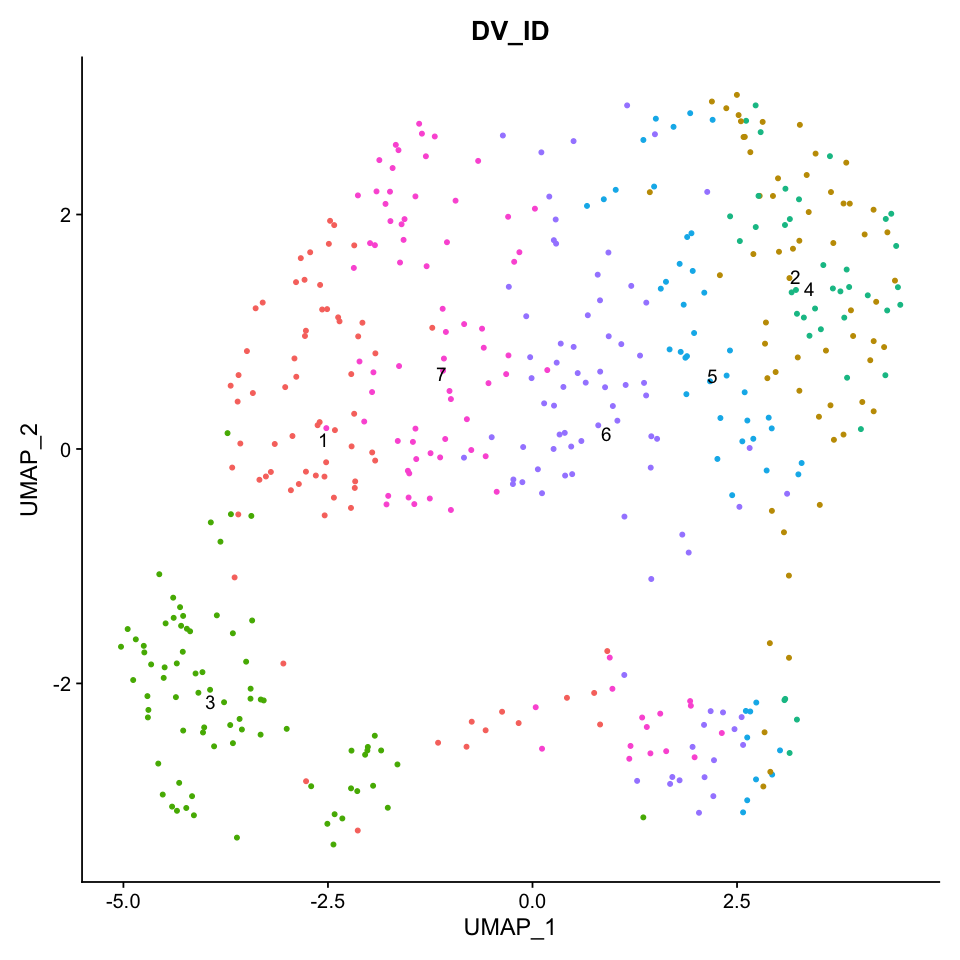

In [24]:
seu.ecto$DV_ID <- trunk_ect_DV_cluster$cluster
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.ecto, reduction = 'umap', group.by = 'DV_ID',label = TRUE) + NoLegend()

In [25]:
set.seed(2)
trunk_ect_DV_cluster <- kmeans(x=t(norm.count.ecto.dv.genes), centers=7)

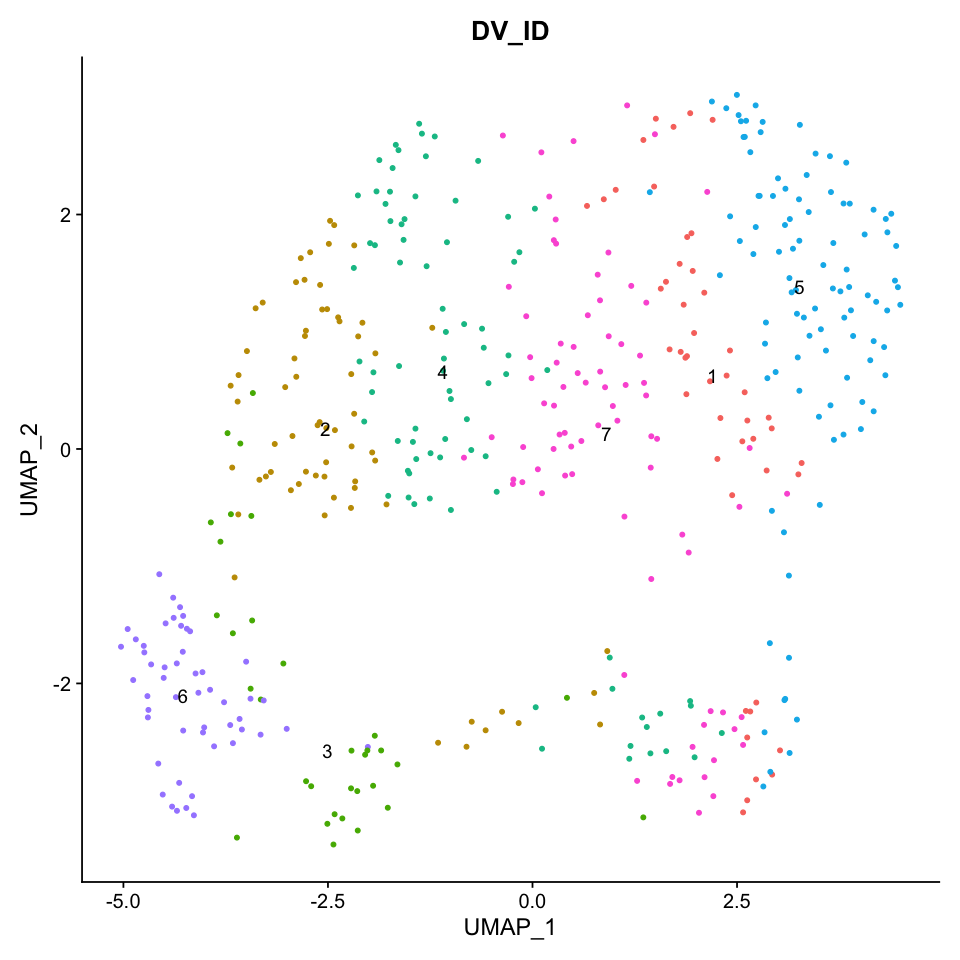

In [26]:
seu.ecto$DV_ID <- trunk_ect_DV_cluster$cluster
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.ecto, reduction = 'umap', group.by = 'DV_ID',label = TRUE) + NoLegend()

In [27]:
Idents(seu.ecto) <- 'DV_ID'
levels(seu.ecto) <- c(5,1,7,4,2,3,6)
all.markers.ecto <- FindAllMarkers(object = seu.ecto, only.pos = TRUE)
nrow(all.markers.ecto)
all.markers.ecto.top10 <- all.markers.ecto %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.ecto.top10)

Calculating cluster 5

Calculating cluster 1

Calculating cluster 7

Calculating cluster 4

Calculating cluster 2

Calculating cluster 3

Calculating cluster 6



[1] 1160

[1] 70

Warning message in DoHeatmap(seu.ecto, features = c(all.markers.ecto.top10$gene)):
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: CG17209”


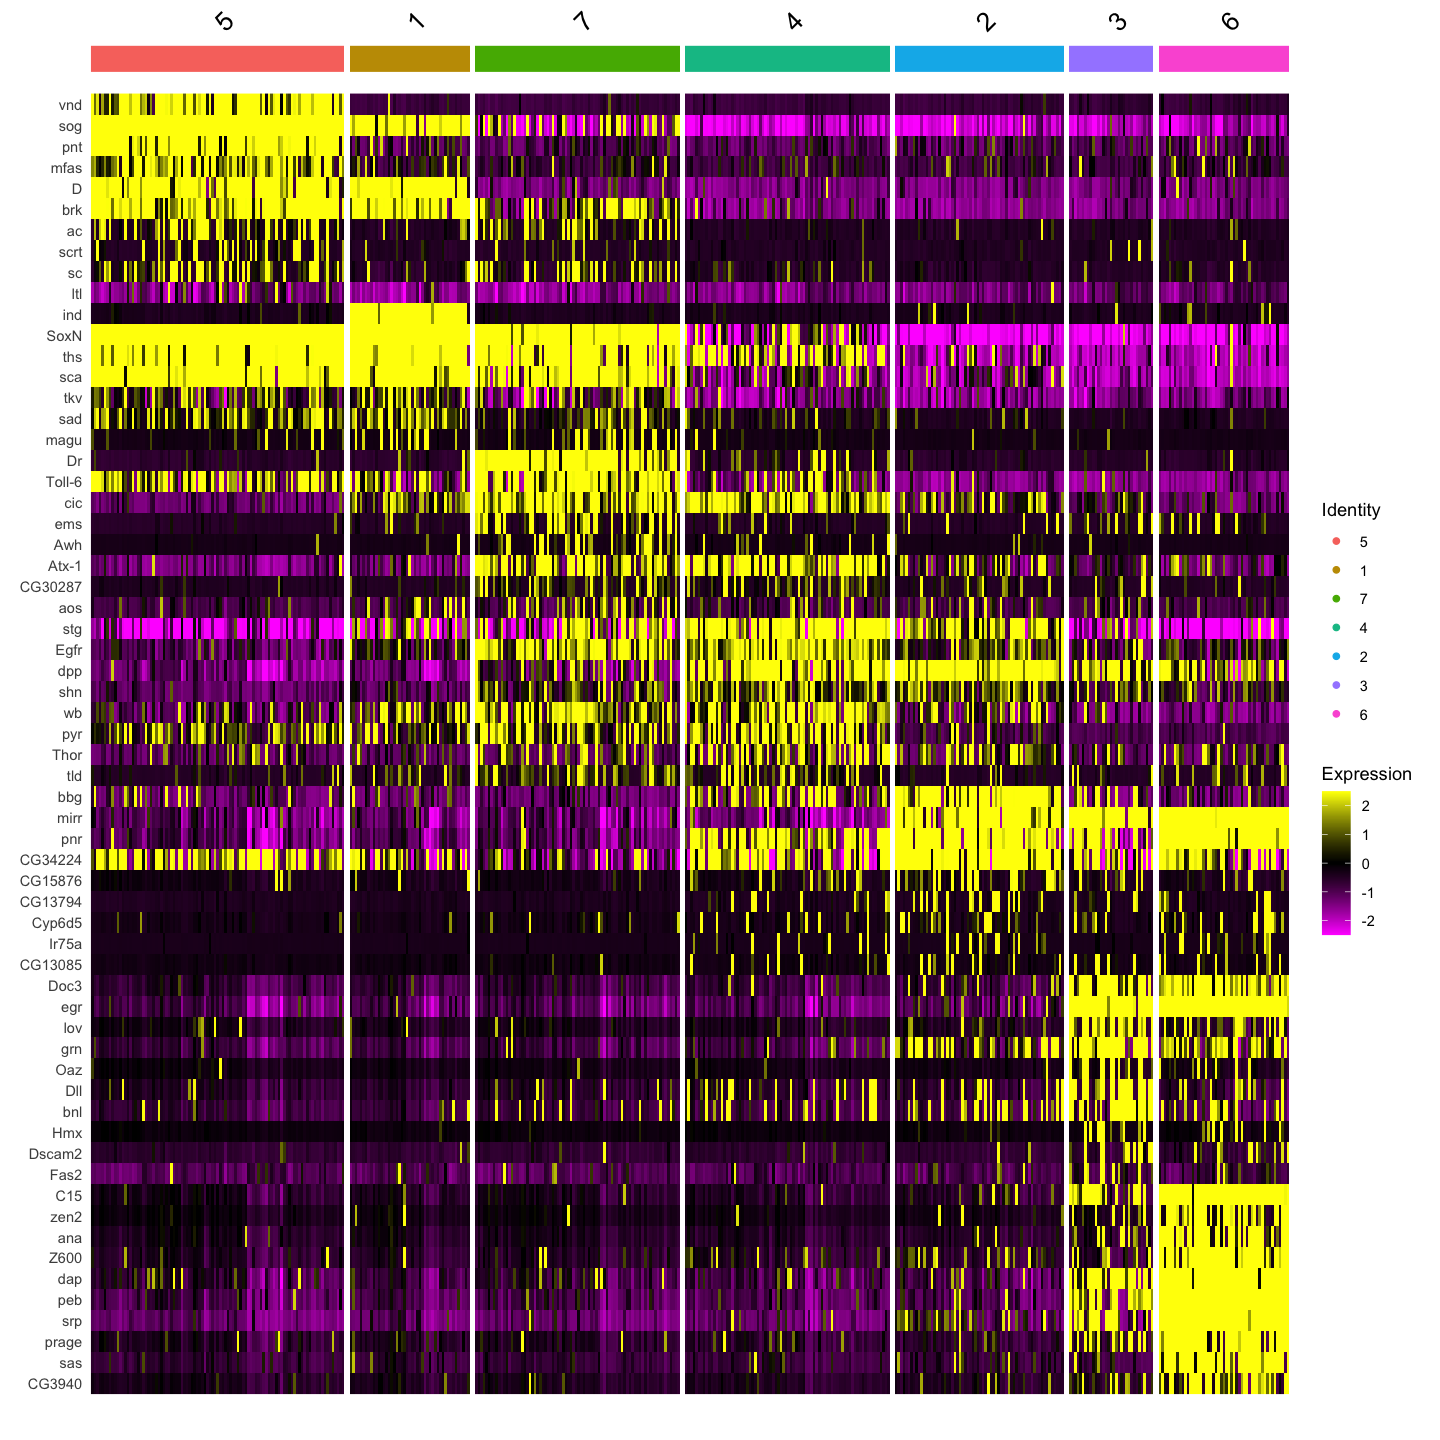

In [28]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu.ecto, features = c(all.markers.ecto.top10$gene))

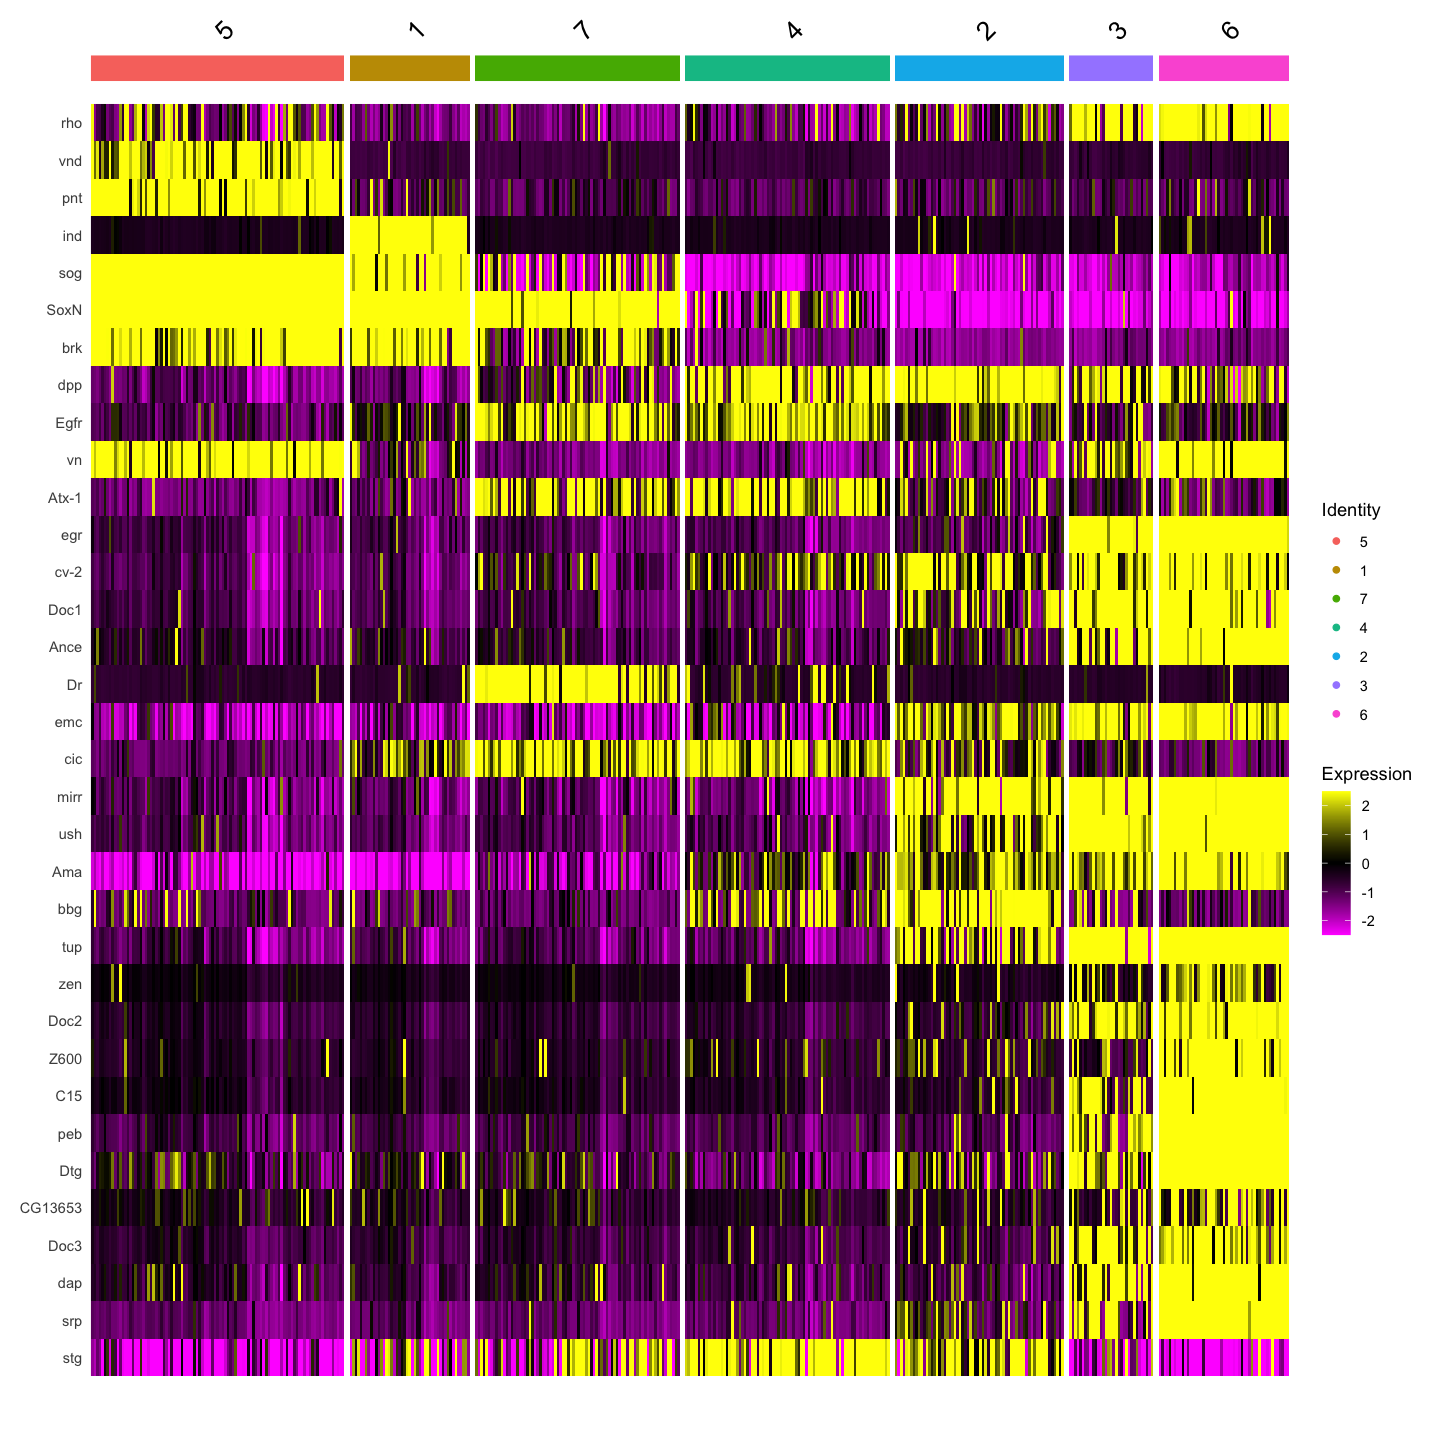

In [29]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu.ecto, features = DV_genes)

In [30]:
manual_id <- as.data.frame(seu.ecto$DV_ID)
colnames(manual_id) <- c('manual_ID')
head(manual_id)
manual_id$manual_ID <- dplyr::recode(manual_id$manual_ID, 
                                "5" = "ectoderm_medial_NE", 
                                "1" = "ectoderm_intermediate_NE", 
                                "7" = "ectoderm_lateral_NE",
                                "4" = "ectoderm_lateral_DE",
                                "2" = "ectoderm_intermediate_DE",
                                "3" = "ectoderm_medial_DE",
                                "6" = "amnioserosa"
                                )
head(manual_id)

manual_ID
batch1_col1GACTCA 4        
batch1_col1GTCTAC 3        
batch1_col1TAGTCG 6        
batch1_col2TCTCAG 7        
batch1_col3GCTGAT 6        
batch1_col3GTGCAT 4

manual_ID          
batch1_col1GACTCA ectoderm_lateral_DE
batch1_col1GTCTAC ectoderm_medial_DE 
batch1_col1TAGTCG amnioserosa        
batch1_col2TCTCAG ectoderm_lateral_NE
batch1_col3GCTGAT amnioserosa        
batch1_col3GTGCAT ectoderm_lateral_DE

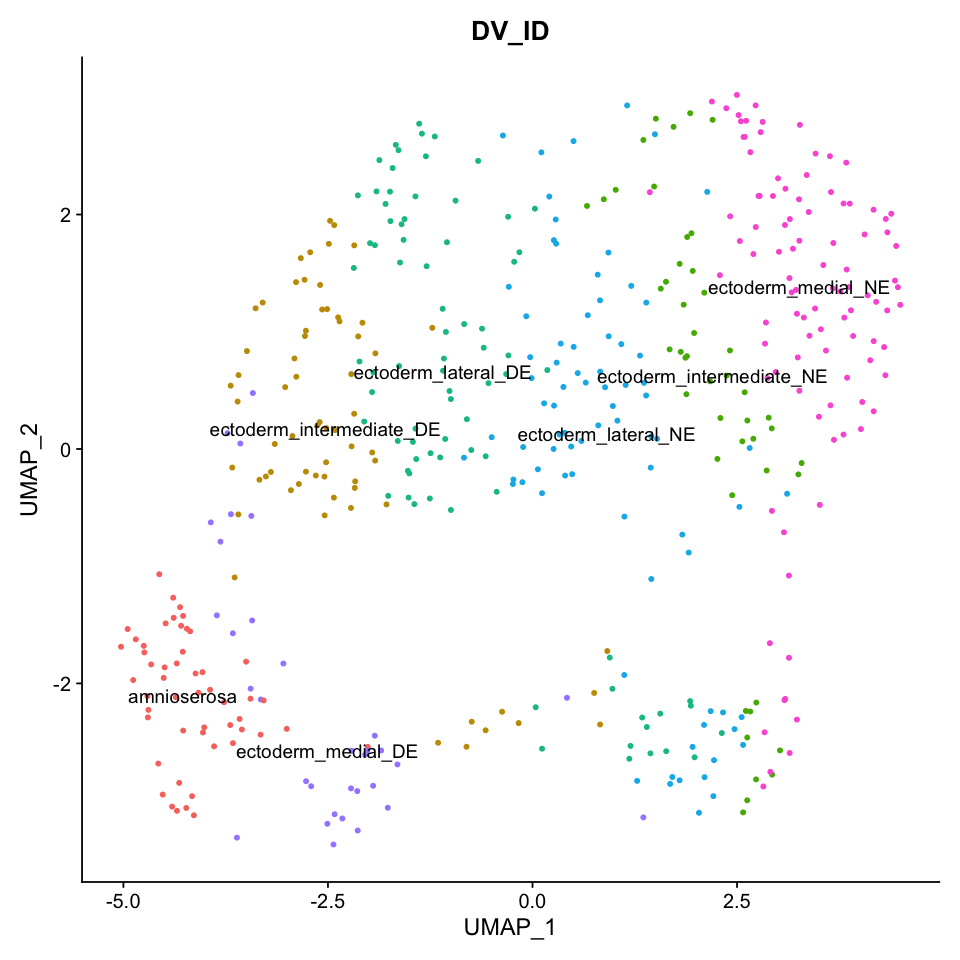

In [31]:
seu.ecto$DV_ID <- manual_id$manual_ID
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.ecto, reduction = 'umap', group.by = 'DV_ID',label = TRUE) + NoLegend()

## Merge DV and AP annotation

In [32]:
merged.id <- as.data.frame(paste(seu.ecto$DV_ID, seu.ecto$AP_ID,sep = '_'))
colnames(merged.id) <- c('manual_ID')
row.names(merged.id) <- colnames(seu.ecto)
head(merged.id)

manual_ID                      
batch1_col1GACTCA ectoderm_lateral_DE_abdominal  
batch1_col1GTCTAC ectoderm_medial_DE_PS1_and_PS2 
batch1_col1TAGTCG amnioserosa_amnioserosa        
batch1_col2TCTCAG ectoderm_lateral_NE_abdominal  
batch1_col3GCTGAT amnioserosa_amnioserosa        
batch1_col3GTGCAT ectoderm_lateral_DE_PS1_and_PS2

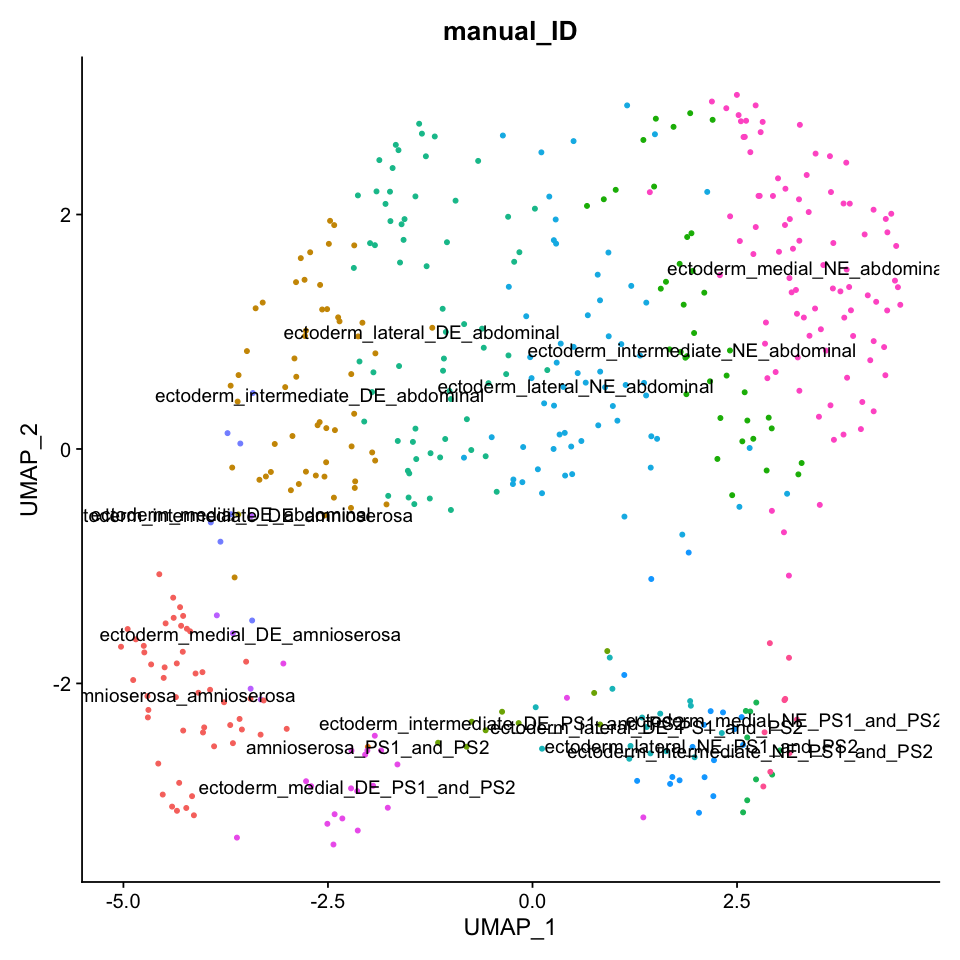

In [33]:
seu.ecto$manual_ID <- merged.id$manual_ID
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.ecto, reduction = 'umap', group.by = 'manual_ID',label = TRUE) + NoLegend()

In [34]:
unique(seu.ecto$manual_ID)

[1] "ectoderm_lateral_DE_abdominal"       
 [2] "ectoderm_medial_DE_PS1_and_PS2"      
 [3] "amnioserosa_amnioserosa"             
 [4] "ectoderm_lateral_NE_abdominal"       
 [5] "ectoderm_lateral_DE_PS1_and_PS2"     
 [6] "ectoderm_medial_NE_abdominal"        
 [7] "ectoderm_intermediate_DE_abdominal"  
 [8] "ectoderm_intermediate_NE_abdominal"  
 [9] "ectoderm_medial_DE_amnioserosa"      
[10] "ectoderm_medial_DE_abdominal"        
[11] "ectoderm_lateral_NE_PS1_and_PS2"     
[12] "ectoderm_intermediate_NE_PS1_and_PS2"
[13] "ectoderm_intermediate_DE_PS1_and_PS2"
[14] "ectoderm_medial_NE_PS1_and_PS2"      
[15] "ectoderm_intermediate_DE_amnioserosa"
[16] "amnioserosa_PS1_and_PS2"

In [35]:
merged.id$manual_ID <- gsub('amnioserosa_amnioserosa','amnioserosa_trunk', merged.id$manual_ID)
merged.id$manual_ID <- gsub('amnioserosa_PS1_and_PS2','amnioserosa_trunk', merged.id$manual_ID)
merged.id$manual_ID <- gsub('ectoderm_intermediate_DE_amnioserosa','amnioserosa_trunk', merged.id$manual_ID)
merged.id$manual_ID <- gsub('ectoderm_medial_DE_amnioserosa','amnioserosa_trunk', merged.id$manual_ID)

In [36]:
unique(merged.id$manual_ID)

[1] "ectoderm_lateral_DE_abdominal"       
 [2] "ectoderm_medial_DE_PS1_and_PS2"      
 [3] "amnioserosa_trunk"                   
 [4] "ectoderm_lateral_NE_abdominal"       
 [5] "ectoderm_lateral_DE_PS1_and_PS2"     
 [6] "ectoderm_medial_NE_abdominal"        
 [7] "ectoderm_intermediate_DE_abdominal"  
 [8] "ectoderm_intermediate_NE_abdominal"  
 [9] "ectoderm_medial_DE_abdominal"        
[10] "ectoderm_lateral_NE_PS1_and_PS2"     
[11] "ectoderm_intermediate_NE_PS1_and_PS2"
[12] "ectoderm_intermediate_DE_PS1_and_PS2"
[13] "ectoderm_medial_NE_PS1_and_PS2"

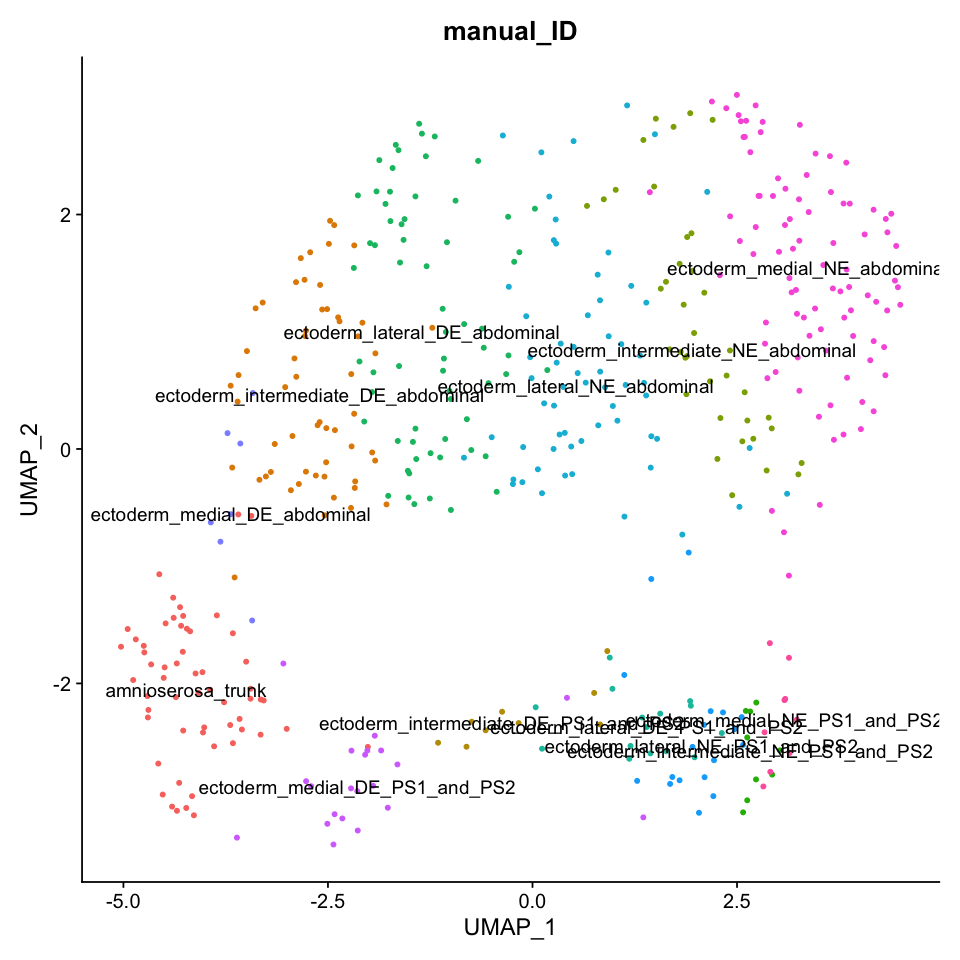

In [37]:
seu.ecto$manual_ID <- merged.id$manual_ID
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu.ecto, reduction = 'umap', group.by = 'manual_ID',label = TRUE) + NoLegend()

In [38]:
Idents(seu.ecto) <- 'manual_ID'
levels(seu.ecto) <- c('amnioserosa_trunk','ectoderm_medial_DE_abdominal',
                      'ectoderm_intermediate_DE_abdominal','ectoderm_lateral_DE_abdominal',
                     'ectoderm_lateral_NE_abdominal','ectoderm_intermediate_NE_abdominal',
                     'ectoderm_medial_NE_abdominal','ectoderm_medial_DE_PS1_and_PS2',
                      'ectoderm_intermediate_DE_PS1_and_PS2','ectoderm_lateral_DE_PS1_and_PS2',
                     'ectoderm_lateral_NE_PS1_and_PS2','ectoderm_intermediate_NE_PS1_and_PS2',
                     'ectoderm_medial_NE_PS1_and_PS2')
all.markers.ecto <- FindAllMarkers(object = seu.ecto, only.pos = TRUE)
nrow(all.markers.ecto)
all.markers.ecto.top10 <- all.markers.ecto %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.ecto.top10)

Calculating cluster amnioserosa_trunk

Calculating cluster ectoderm_medial_DE_abdominal

Calculating cluster ectoderm_intermediate_DE_abdominal

Calculating cluster ectoderm_lateral_DE_abdominal

Calculating cluster ectoderm_lateral_NE_abdominal

Calculating cluster ectoderm_intermediate_NE_abdominal

Calculating cluster ectoderm_medial_NE_abdominal

Calculating cluster ectoderm_medial_DE_PS1_and_PS2

Calculating cluster ectoderm_intermediate_DE_PS1_and_PS2

Calculating cluster ectoderm_lateral_DE_PS1_and_PS2

Calculating cluster ectoderm_lateral_NE_PS1_and_PS2

Calculating cluster ectoderm_intermediate_NE_PS1_and_PS2

Calculating cluster ectoderm_medial_NE_PS1_and_PS2



[1] 2313

[1] 130

Saving 7 x 7 in image



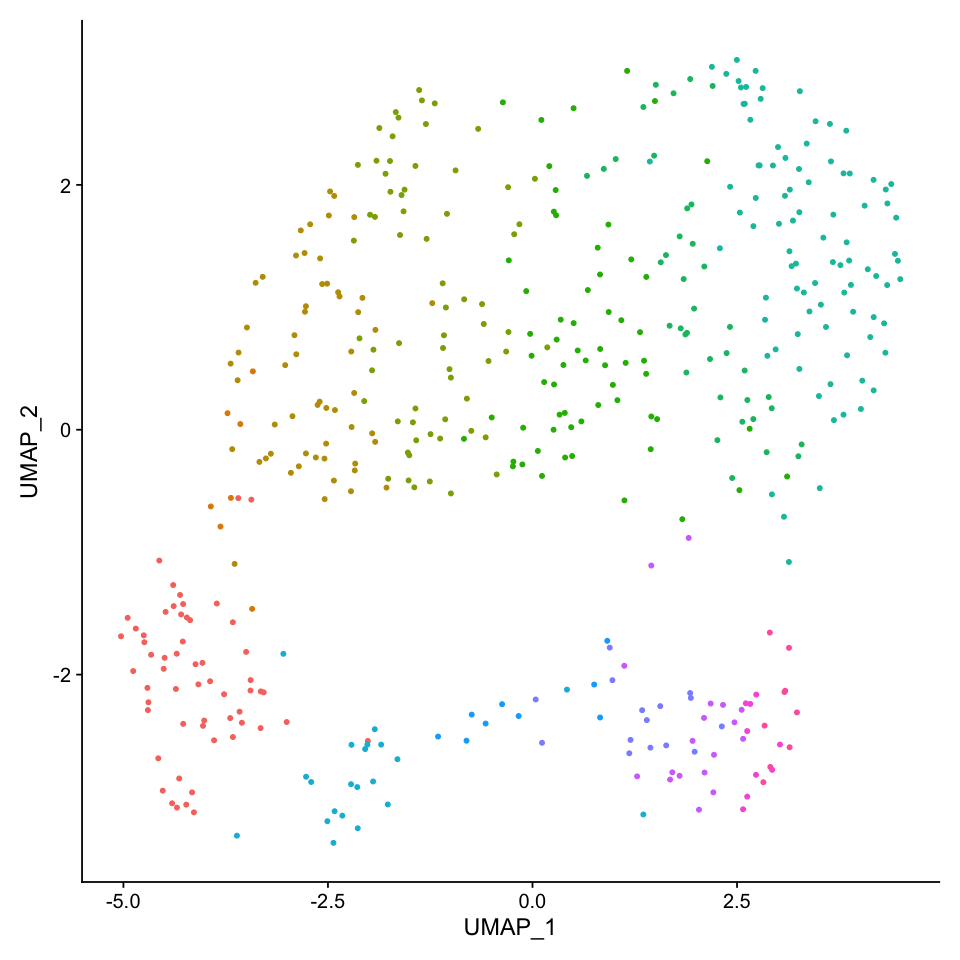

In [39]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu.ecto, reduction =  "umap", label = FALSE) + NoLegend() 
fig
ggsave(fig, file = "./figures/04_lateral_ecto_subclustering_Set1/lateral_ect_umap1.eps", dpi = 300)

Saving 7 x 7 in image



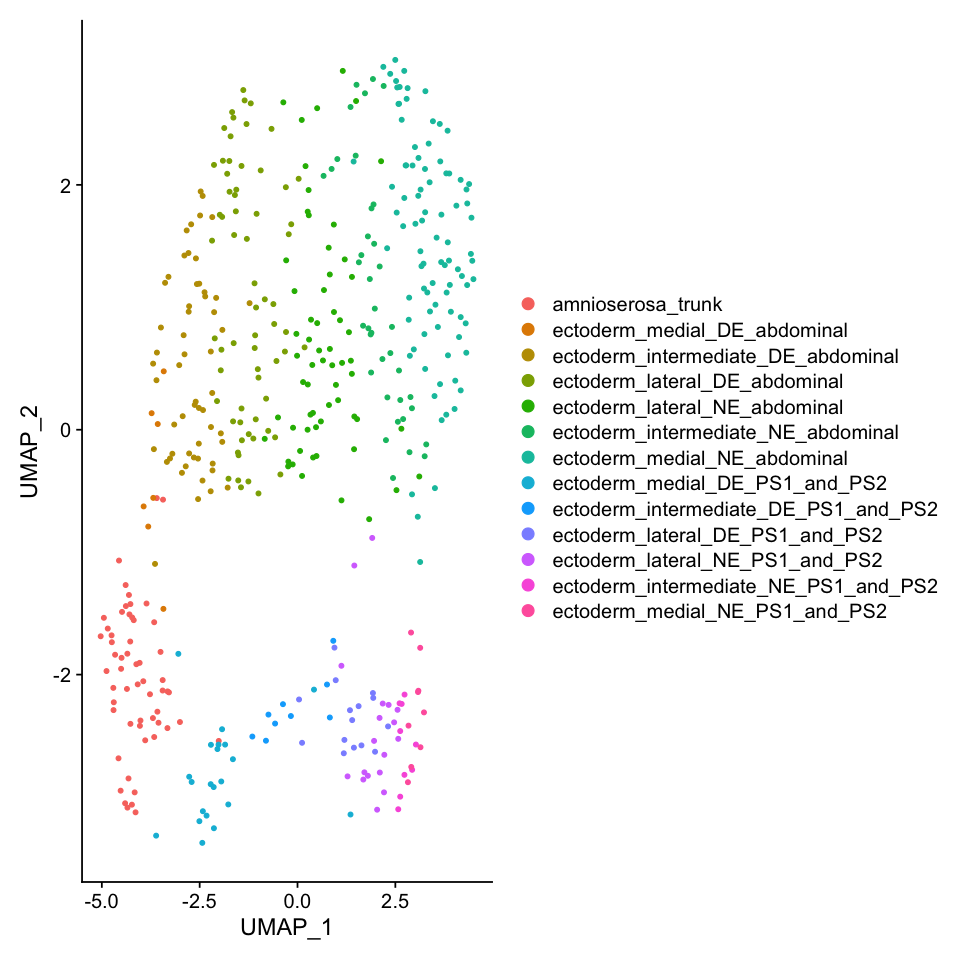

In [40]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu.ecto, reduction =  "umap", label = FALSE)
fig
ggsave(fig, file = "./figures/04_lateral_ecto_subclustering_Set1/lateral_ect_umap2.eps", dpi = 300)

Warning message in DoHeatmap(seu.ecto, features = c(all.markers.ecto.top10$gene)):
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: Kank, CG1602, CG14104, CG32037, Gart, Mrp4”


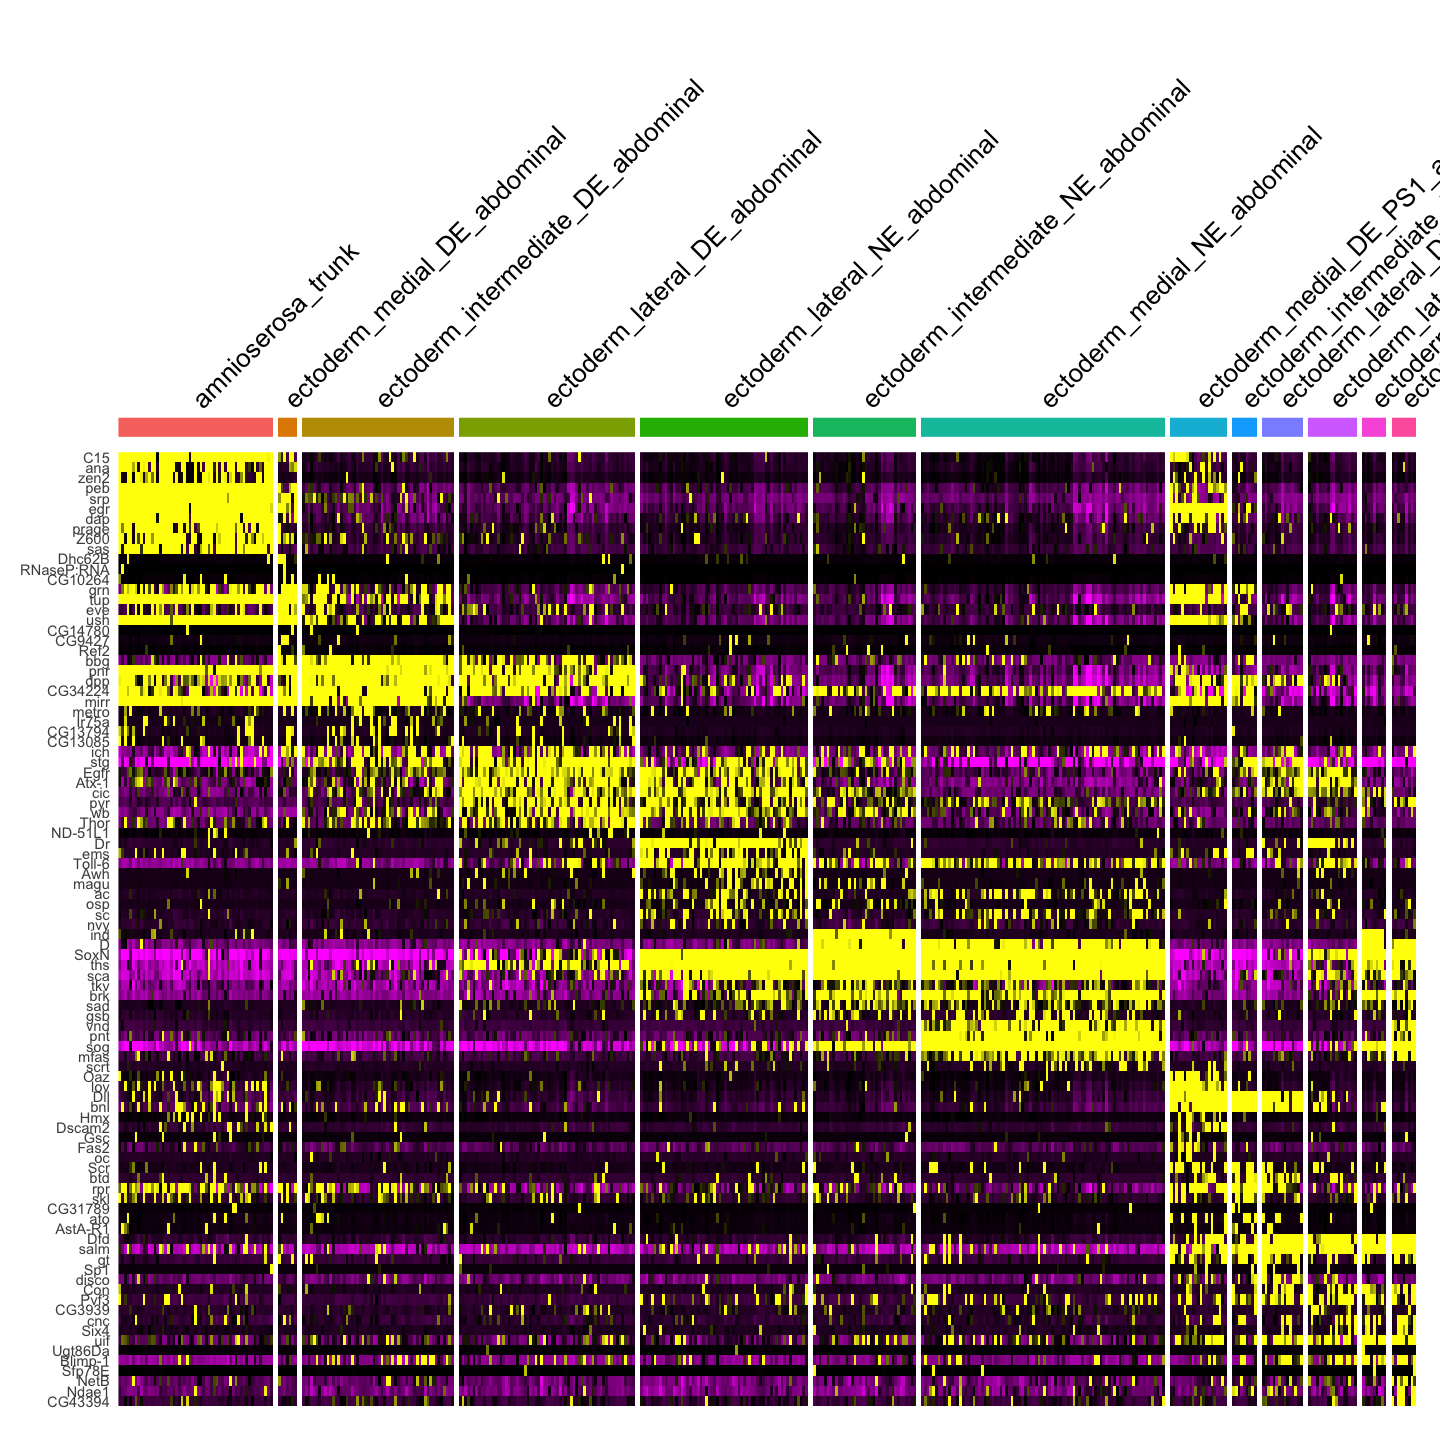

In [41]:
options(repr.plot.width=12, repr.plot.height=12)
fig <- DoHeatmap(seu.ecto, features = c(all.markers.ecto.top10$gene)) + NoLegend()
fig
ggsave(fig, file = "./figures/04_lateral_ecto_subclustering_Set1/lateral_ecto_manualID_heatmap.eps", dpi = 300,  width = 12, height = 12)

Warning message in DoHeatmap(seu.ecto, features = c(all.markers.ecto.top10$gene)):
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: Kank, CG1602, CG14104, CG32037, Gart, Mrp4”


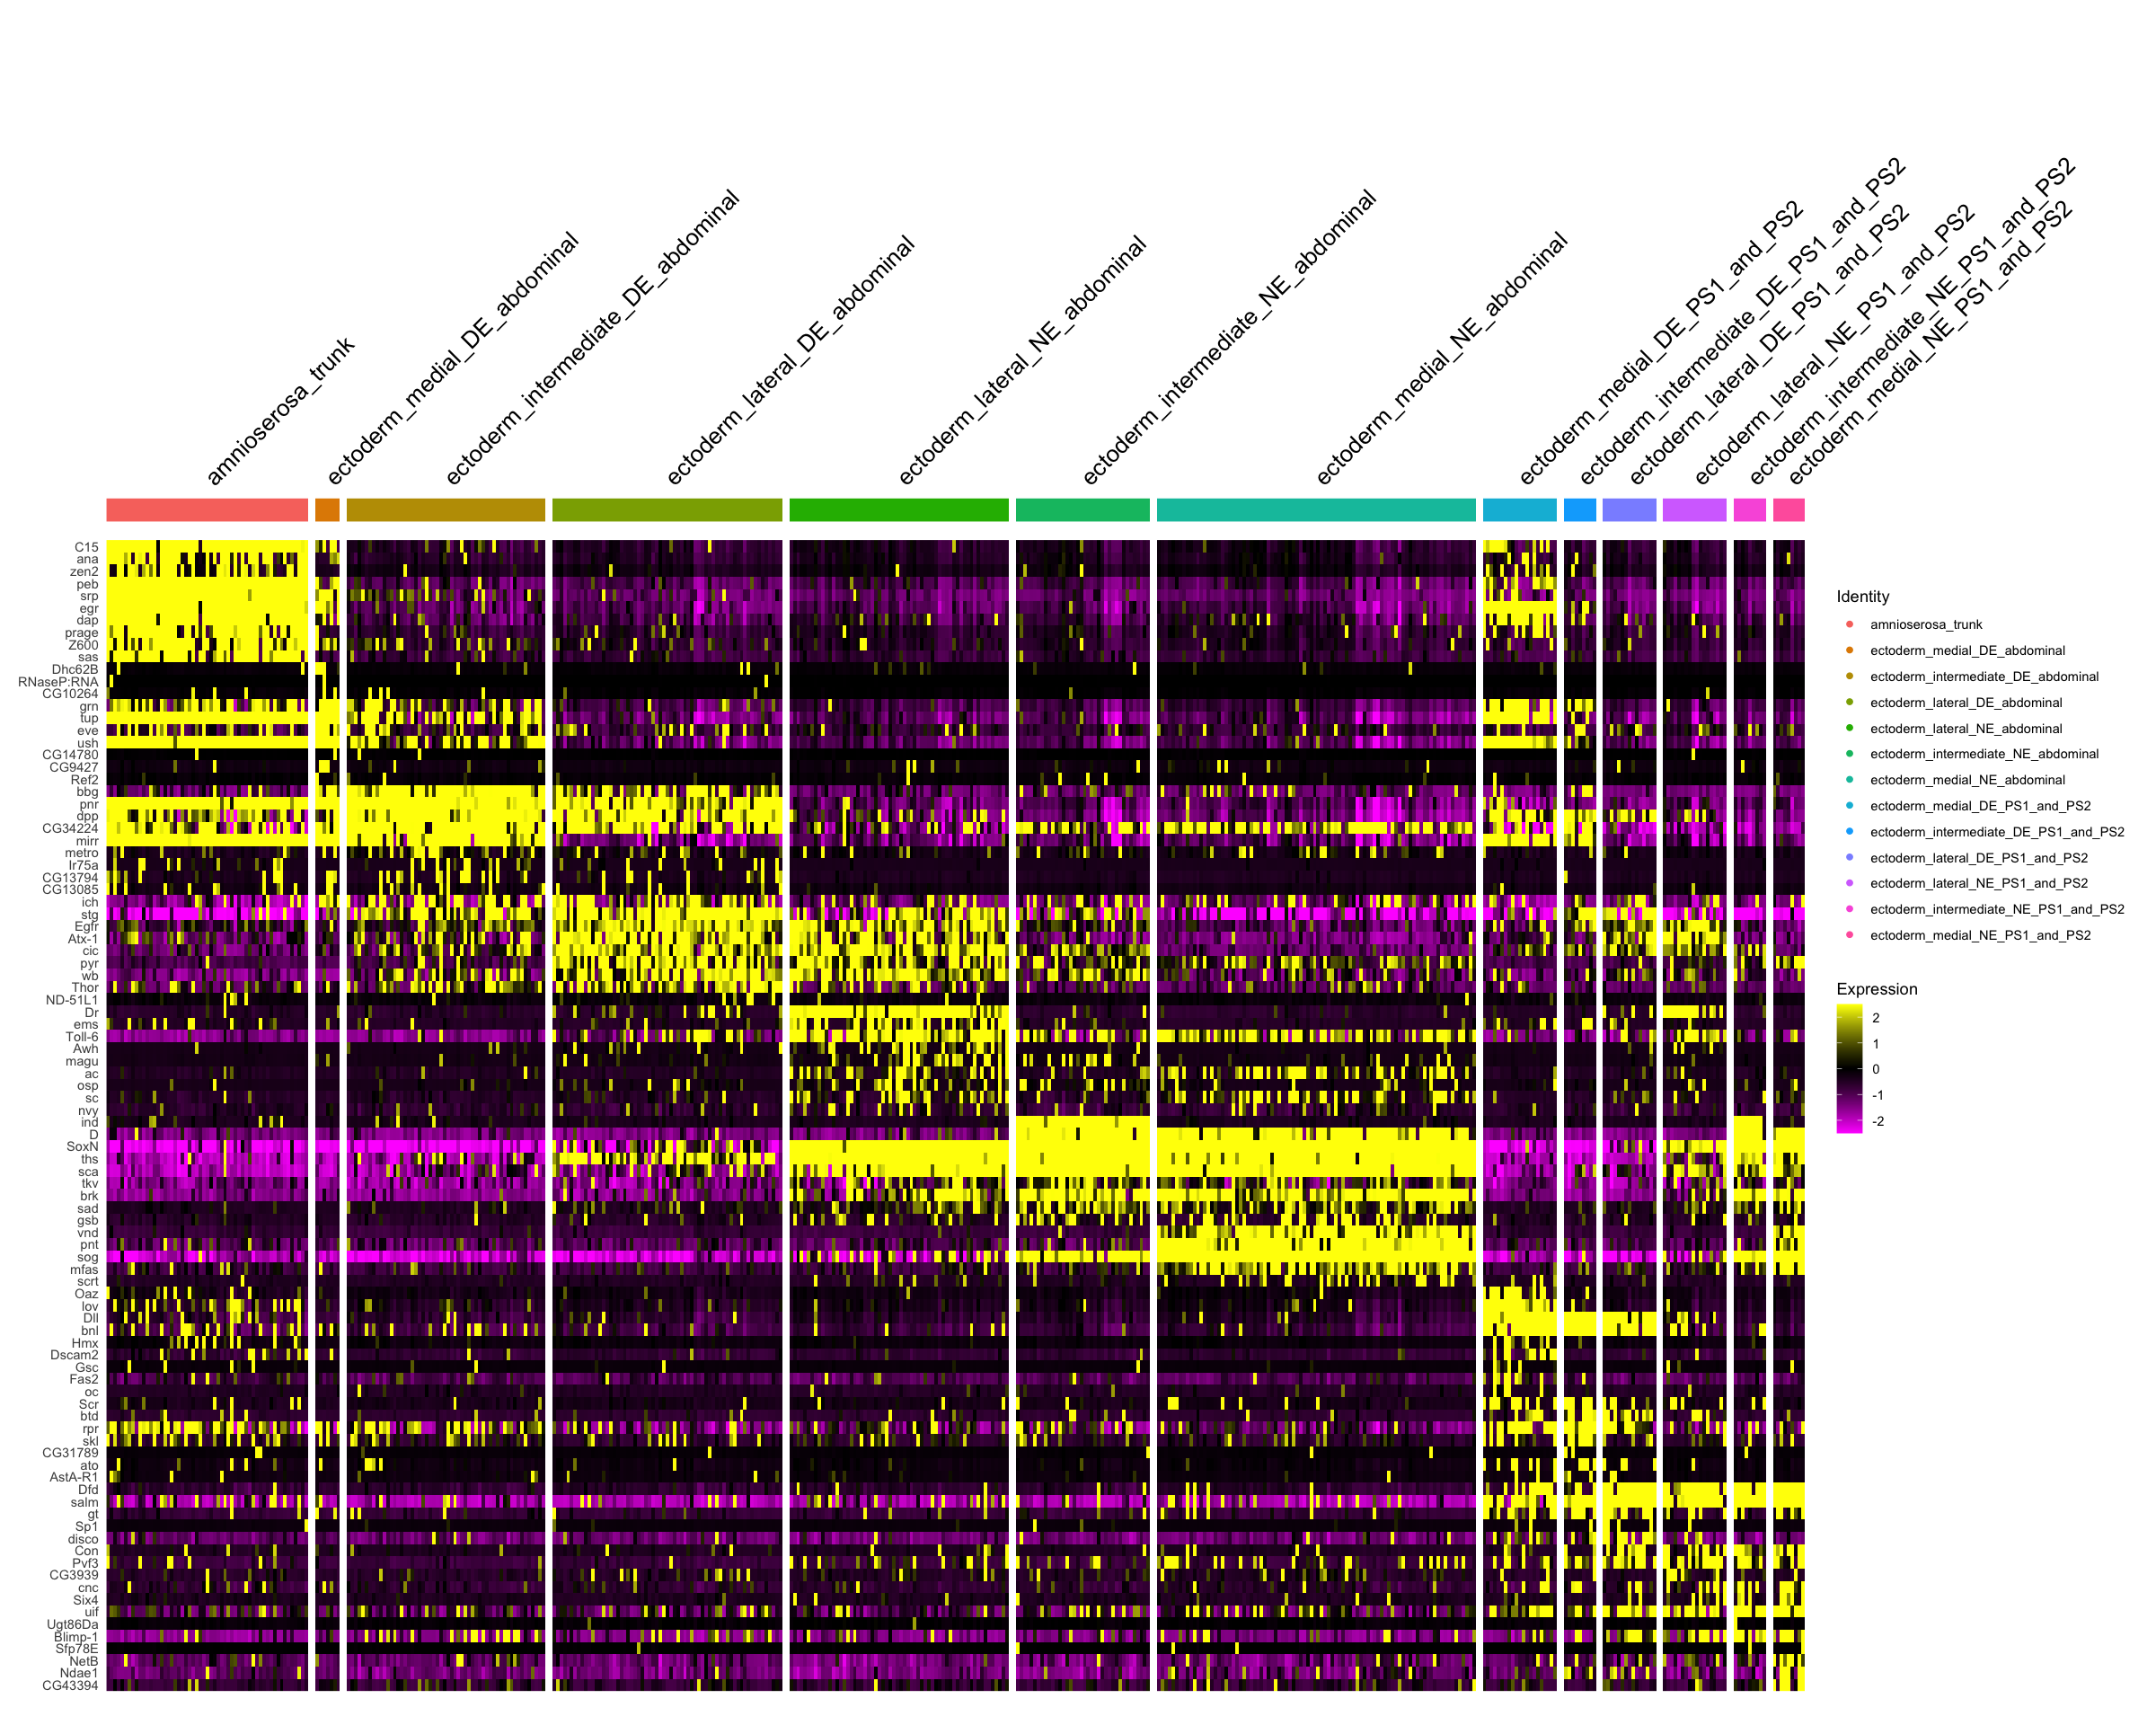

In [42]:
options(repr.plot.width=20, repr.plot.height=16)
DoHeatmap(seu.ecto, features = c(all.markers.ecto.top10$gene))

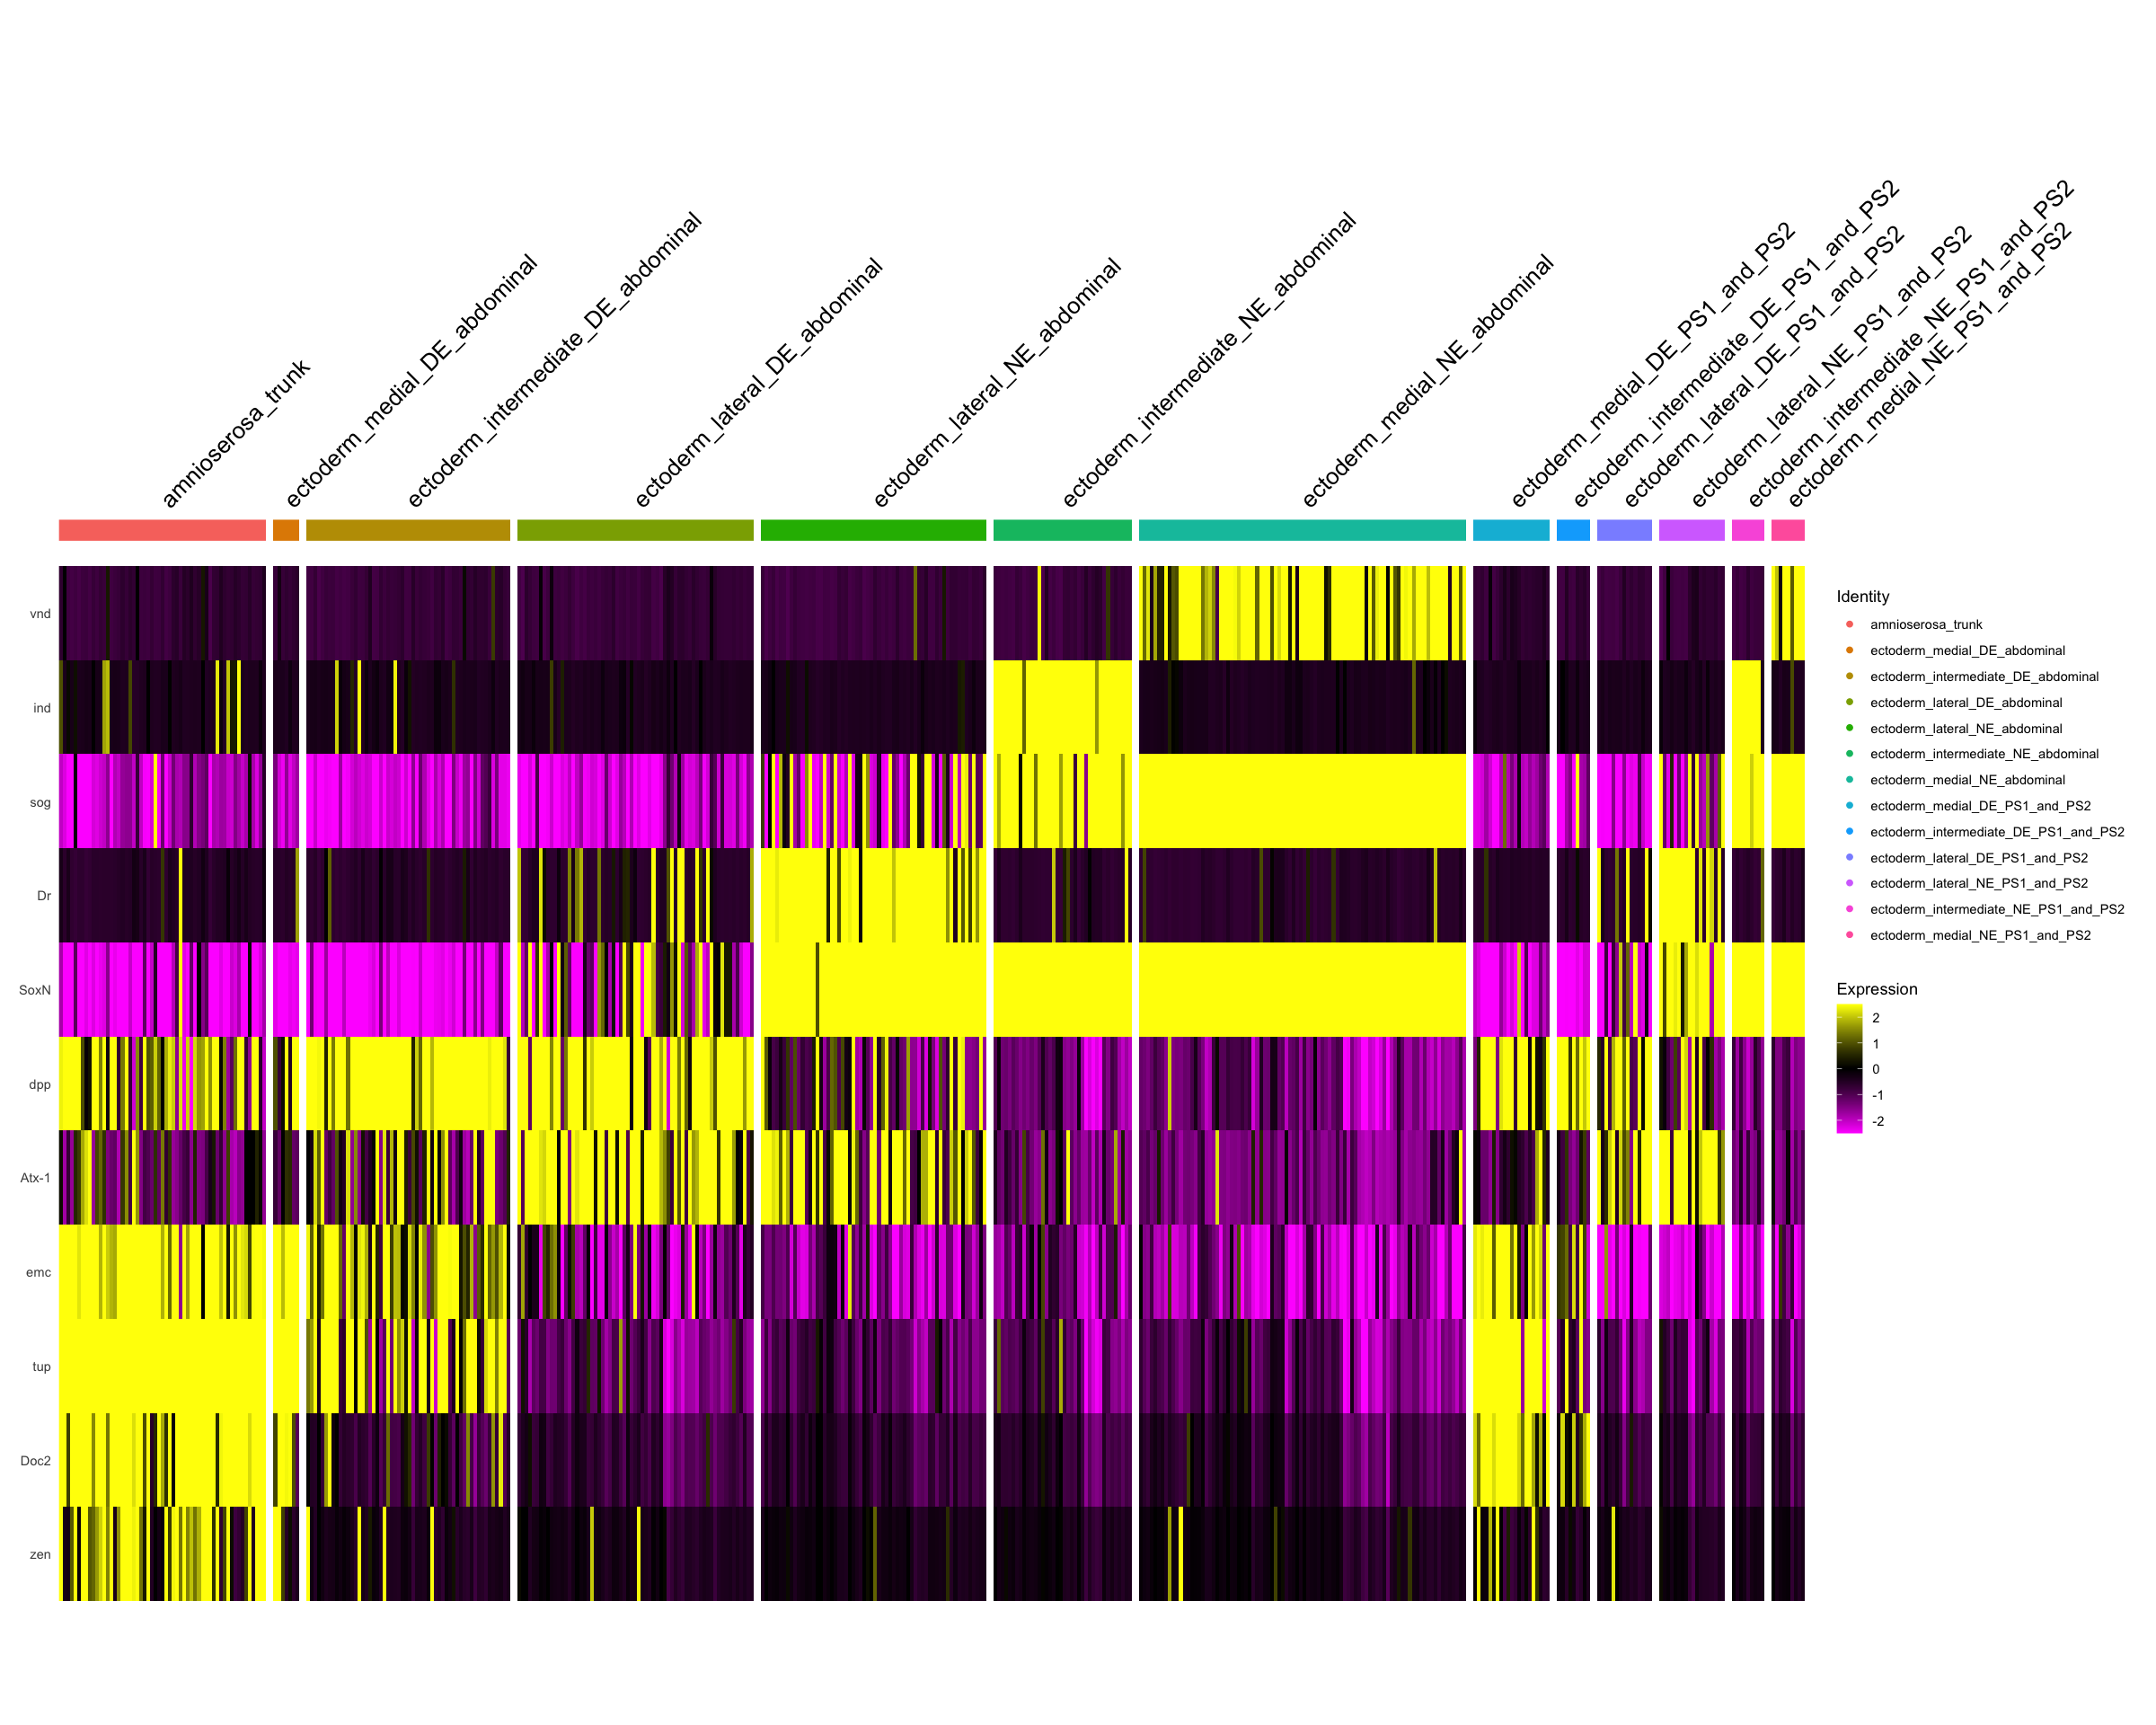

In [43]:
options(repr.plot.width=20, repr.plot.height=16)
DoHeatmap(seu.ecto, features = c('vnd','ind','sog','Dr','SoxN','dpp','Atx-1','emc','tup','Doc2','zen'))

In [44]:
saveRDS(object = seu.ecto, file = '../../data/seurat_object/Set1/subclustering/seu_lateral_ecto_subclustered.obj')

In [45]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tibble_3.0.5      dplyr_1.0.3       Matrix_1.3-2      data.table_1.13.6
[5] magrittr_2.0.1    ggplot2_3.3.3     Seurat_3.2.3     

loaded via a namespace (and not attached):
  [1] nlme_3.1-151          matrixStats_0.57.0    RcppAnnoy_0.0.18     
  [4] RColorBrewer_1.1-2    httr_1.4.2            repr_1.1.0           
  [7] sctransform_0.3.2     tools_4.0.3           R6_2.5.1             
 [10] irlba_2.3.3           rpart_4.1-15          KernSmooth_2.23-18   
 [13] uwot_0.1.10           mgcv